In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib
from matplotlib import rc_context, rcParams
from numpy.random import shuffle

import pandas as pd
import scanpy as sc
import util

import pickle
from tqdm import tqdm

# Load and clean U2-OS data

In [221]:
d2 = sc.read_h5ad(r'..\merfish_data\bento_u2os\merfish_processed.h5ad')

In [238]:
d2.X.shape

(1022, 135)

In [239]:
data = d2.uns['points']

In [240]:
data

x            y         gene   cell nucleus batch
0         1539.00000  1194.074200  notarget001   31-0      -1     0
1         1020.46277   368.644230  notarget002   15-0      -1     0
2         1469.50900   608.816700  notarget002   16-0       7     0
3         1224.54750  1373.591000  notarget003   28-0      -1     0
4         1541.75090   124.650345       AKAP11   11-0      -1     0
...              ...          ...          ...    ...     ...   ...
16907943   441.81622   666.157960       MALAT1  16-69       8    69
16907944   408.66090   687.625300       MALAT1  16-69       8    69
16907945   430.00000   689.167850       MALAT1  16-69       8    69
16907946  1634.78830   783.617100       MALAT1  23-69       9    69
16907947   500.70080   673.430700         FBN2  16-69       8    69

[15315044 rows x 6 columns]

In [241]:
np.unique(data['gene'].tolist())

array(['AFAP1', 'AFF4', 'AGAP1', 'AGO3', 'AGPS', 'AHDC1', 'AKAP11',
       'ALPK2', 'AMOTL1', 'ANKH', 'ANKRD52', 'ARL10', 'ASCC3', 'BRCA2',
       'BSN', 'BUB3', 'C14orf132', 'C17orf51', 'CBL', 'CBX5', 'CCDC113',
       'CDYL2', 'CEMIP', 'CENPF', 'CEP250', 'CHST3', 'CKAP5', 'CNR2',
       'COL5A1', 'CREBBP', 'CRTAP', 'DIEXF', 'DIP2B', 'DNAJC13', 'DOPEY1',
       'DSEL', 'DYNC1H1', 'EGFR', 'FAF2', 'FAM184B', 'FAM208B', 'FASN',
       'FBN1', 'FBN2', 'FYCO1', 'FZD4', 'FZD5', 'GPR107', 'GTF3C4',
       'HEATR5B', 'HERC2', 'IGF2R', 'IL17RA', 'ITPR2', 'KIAA1147',
       'KIAA1462', 'KIF13B', 'KLHL9', 'KPNA4', 'LMTK2', 'LRP1', 'LUZP1',
       'MALAT1', 'MAN1A2', 'MCF2L', 'MED14', 'MYH10', 'NHSL2', 'NKTR',
       'NOTCH2', 'NRIP1', 'PAPPA', 'PHIP', 'PIK3CA', 'PLXNA1', 'PLXNA2',
       'POLQ', 'PRDM2', 'PRKCA', 'PRKDC', 'PROSER1', 'PRPF8', 'PRRC2B',
       'PTPN14', 'RAB3B', 'RAD51D', 'RBM20', 'RNF152', 'RNF169',
       'RP4-671O14.6', 'SAMD12', 'SCUBE3', 'SIPA1L3', 'SKP1', 'SLC35B4',
       '

In [242]:
names = ['notarget001','notarget002','notarget003','notarget004','notarget005',
         'blank001','blank002','blank003','blank004','blank005']
index = []
for n in names:
    index.append(data[data['gene']==n].index)
index = np.concatenate(index)
data_dropped = data.drop(index , inplace=False)

In [243]:
data_dropped

x           y    gene   cell nucleus batch
4         1541.75090  124.650345  AKAP11   11-0      -1     0
5         1526.97580  248.519300  AKAP11   11-0      -1     0
6         1739.53400  363.478000  AKAP11   11-0       3     0
7         1420.07250  542.724060  AKAP11   16-0       7     0
8         1452.24240  563.947270  AKAP11   16-0       7     0
...              ...         ...     ...    ...     ...   ...
16907943   441.81622  666.157960  MALAT1  16-69       8    69
16907944   408.66090  687.625300  MALAT1  16-69       8    69
16907945   430.00000  689.167850  MALAT1  16-69       8    69
16907946  1634.78830  783.617100  MALAT1  23-69       9    69
16907947   500.70080  673.430700    FBN2  16-69       8    69

[15287142 rows x 6 columns]

In [244]:
data = data_dropped
data.to_csv(r'..\merfish_data\bento_u2os\cleaned_u2os.csv')

In [2]:
# Read cleaned data
data = pd.read_csv(r'..\merfish_data\bento_u2os\cleaned_u2os.csv')

## Load fibroblast data

In [4]:
original_data = pd.read_csv(r'..\merfish_data\140genesData.csv')

In [5]:
original_data

experiment  library  cellID  intCodeword geneName  isExactMatch  \
0                1        1       0        33796   SCUBE3             0   
1                1        1       0        34048   SCUBE3             0   
2                1        1       0        33794      SON             0   
3                1        1       0        32802     AFF4             0   
4                1        1       0        33856     FOSB             0   
...            ...      ...     ...          ...      ...           ...   
747564           7        1      70        33281     FLNB             0   
747565           7        1      70          613    NUMA1             0   
747566           7        1      70          529     FLNA             0   
747567           7        1      70          529     FLNA             0   
747568           7        1      70         2561     FLNA             0   

        isCorrectedMatch  CellPositionX  CellPositionY  RNACentroidX  \
0                      1          475.5          630.6     78.723714   
1                      1          475.5          630.6     81.297819   
2                      1          475.5          630.6     92.627268   
3                      1          475.5          630.6    101.404081   
4                      1          475.5          630.6    107.676392   
...                  ...            ...            ...           ...   
747564                 1          139.7         -290.0     39.490532   
747565                 1          139.7         -290.0    102.088399   
747566                 1          139.7         -290.0    115.132677   
747567                 1          139.7         -290.0    128.740309   
747568                 1          139.7         -290.0    173.063576   

        RNACentroidY  
0         154.452489  
1         229.918727  
2         212.018163  
3         220.580093  
4         173.956553  
...              ...  
747564    133.785946  
747565    116.376588  
747566    133.974428  
747567    148.098908  
747568    105.042806  

[747569 rows x 11 columns]

In [153]:
data = original_data.dropna()

In [154]:
data

experiment  library  cellID  intCodeword geneName  isExactMatch  \
0                1        1       0        33796   SCUBE3             0   
1                1        1       0        34048   SCUBE3             0   
2                1        1       0        33794      SON             0   
3                1        1       0        32802     AFF4             0   
4                1        1       0        33856     FOSB             0   
...            ...      ...     ...          ...      ...           ...   
747564           7        1      70        33281     FLNB             0   
747565           7        1      70          613    NUMA1             0   
747566           7        1      70          529     FLNA             0   
747567           7        1      70          529     FLNA             0   
747568           7        1      70         2561     FLNA             0   

        isCorrectedMatch  CellPositionX  CellPositionY  RNACentroidX  \
0                      1          475.5          630.6     78.723714   
1                      1          475.5          630.6     81.297819   
2                      1          475.5          630.6     92.627268   
3                      1          475.5          630.6    101.404081   
4                      1          475.5          630.6    107.676392   
...                  ...            ...            ...           ...   
747564                 1          139.7         -290.0     39.490532   
747565                 1          139.7         -290.0    102.088399   
747566                 1          139.7         -290.0    115.132677   
747567                 1          139.7         -290.0    128.740309   
747568                 1          139.7         -290.0    173.063576   

        RNACentroidY  
0         154.452489  
1         229.918727  
2         212.018163  
3         220.580093  
4         173.956553  
...              ...  
747564    133.785946  
747565    116.376588  
747566    133.974428  
747567    148.098908  
747568    105.042806  

[747569 rows x 11 columns]

In [157]:
np.unique(data['geneName'].tolist())

array(['ABCA2', 'AFAP1', 'AFF4', 'AGPS', 'AKAP11', 'ALMS1', 'ALPK2',
       'AMOTL1', 'ANKRD52', 'ARL10', 'ASCC3', 'ATP11A', 'BRCA2',
       'C14orf132', 'C17orf51', 'CACNA1A', 'CASC5', 'CBL', 'CBX5',
       'CENPF', 'CEP250', 'CHD8', 'CKAP5', 'COL5A1', 'COL7A1', 'CREBBP',
       'DIEXF', 'DIP2B', 'DIP2C', 'DNAJC13', 'DOCK7', 'DOPEY1', 'DSEL',
       'DYNC1H1', 'EGFR', 'FAM208B', 'FASN', 'FBN1', 'FBN2', 'FLNA',
       'FLNB', 'FLNC', 'FOSB', 'FRY', 'FYCO1', 'FZD4', 'GPR107', 'GTF3C1',
       'GTF3C4', 'H6PD', 'HEATR5B', 'HELZ2', 'HERC2', 'HIVEP1', 'HIVEP2',
       'IGF2R', 'IQGAP1', 'ITGA2', 'KIAA1147', 'KIAA1199', 'KIAA1462',
       'KIAA2018', 'KIDINS220', 'KPNA4', 'LMTK2', 'LRP1', 'LUZP1', 'LYST',
       'MALAT1', 'MAN1A2', 'MED14', 'MKI67', 'MYH10', 'NF1', 'NKTR',
       'NOTCH2', 'NR4A1', 'NRIP1', 'NUMA1', 'NUP98', 'PAPPA', 'PCNX',
       'PDS5A', 'PHIP', 'PIEZO1', 'PIK3CA', 'PLXNA1', 'POLQ', 'PRKCA',
       'PRKDC', 'PRPF8', 'PRRC2B', 'PTPN14', 'QSER1', 'RAB3B', 'REV3L',
       '

In [158]:
names = ['notarget001','notarget002','notarget003','notarget004','notarget005',
         'blank001','blank002','blank003','blank004','blank005']
index = []
for n in names:
    index.append(data[data['geneName']==n].index)
index = np.concatenate(index)
data_dropped = data.drop(index , inplace=False)

In [159]:
data

experiment  library  cellID  intCodeword geneName  isExactMatch  \
0                1        1       0        33796   SCUBE3             0   
1                1        1       0        34048   SCUBE3             0   
2                1        1       0        33794      SON             0   
3                1        1       0        32802     AFF4             0   
4                1        1       0        33856     FOSB             0   
...            ...      ...     ...          ...      ...           ...   
747564           7        1      70        33281     FLNB             0   
747565           7        1      70          613    NUMA1             0   
747566           7        1      70          529     FLNA             0   
747567           7        1      70          529     FLNA             0   
747568           7        1      70         2561     FLNA             0   

        isCorrectedMatch  CellPositionX  CellPositionY  RNACentroidX  \
0                      1          475.5          630.6     78.723714   
1                      1          475.5          630.6     81.297819   
2                      1          475.5          630.6     92.627268   
3                      1          475.5          630.6    101.404081   
4                      1          475.5          630.6    107.676392   
...                  ...            ...            ...           ...   
747564                 1          139.7         -290.0     39.490532   
747565                 1          139.7         -290.0    102.088399   
747566                 1          139.7         -290.0    115.132677   
747567                 1          139.7         -290.0    128.740309   
747568                 1          139.7         -290.0    173.063576   

        RNACentroidY  
0         154.452489  
1         229.918727  
2         212.018163  
3         220.580093  
4         173.956553  
...              ...  
747564    133.785946  
747565    116.376588  
747566    133.974428  
747567    148.098908  
747568    105.042806  

[747569 rows x 11 columns]

In [160]:
# Save clean data
data.to_csv(os.path.join(r'..\merfish_data','cleaned140GeneData.csv'))

In [6]:
data = pd.read_csv(os.path.join(r'..\merfish_data\MERFISH_Examples\MERFISH_Examples\MERFISH_Examples\analyzed_data','cleaned_data.csv'))

In [200]:
fib_geneName = np.unique(data['geneName'].tolist()).tolist()

In [202]:
l = [item in u2os_geneNames for item in fib_geneName]

In [233]:
common_names = []
for i,item in enumerate(l):
    if item:
        common_names.append(fib_geneName[i])

In [234]:
common_names

['AFAP1',
 'AFF4',
 'AGPS',
 'AKAP11',
 'ALPK2',
 'AMOTL1',
 'ANKRD52',
 'ARL10',
 'ASCC3',
 'BRCA2',
 'C14orf132',
 'C17orf51',
 'CBL',
 'CBX5',
 'CENPF',
 'CEP250',
 'CKAP5',
 'COL5A1',
 'CREBBP',
 'DIEXF',
 'DIP2B',
 'DNAJC13',
 'DOPEY1',
 'DSEL',
 'DYNC1H1',
 'EGFR',
 'FAM208B',
 'FASN',
 'FBN1',
 'FBN2',
 'FYCO1',
 'FZD4',
 'GPR107',
 'GTF3C4',
 'HEATR5B',
 'HERC2',
 'IGF2R',
 'KIAA1147',
 'KIAA1462',
 'KPNA4',
 'LMTK2',
 'LRP1',
 'LUZP1',
 'MALAT1',
 'MAN1A2',
 'MED14',
 'MYH10',
 'NKTR',
 'NOTCH2',
 'NRIP1',
 'PAPPA',
 'PHIP',
 'PIK3CA',
 'PLXNA1',
 'POLQ',
 'PRKCA',
 'PRKDC',
 'PRPF8',
 'PRRC2B',
 'PTPN14',
 'RAB3B',
 'RNF169',
 'SCUBE3',
 'SIPA1L3',
 'SLC38A1',
 'SLC5A3',
 'SLC7A11',
 'SMARCA5',
 'SPTBN1',
 'SRRM2',
 'SSH1',
 'STARD9',
 'THBS1',
 'THSD4',
 'TLN1',
 'TMOD2',
 'TNRC6A',
 'TPR',
 'UBR2',
 'UBR5',
 'USP24',
 'USP34',
 'USP9X',
 'VPS13D']

## Single-cell patch detection

In [3]:
cell_ids = np.unique(data['cell'].tolist())

In [4]:
cell_ids

array(['0-32', '1-22', '1-25', ..., '9-65', '9-67', '9-68'], dtype='<U5')

In [5]:
groups = data.groupby('cell')

In [6]:
cell_df = groups.get_group(cell_ids[20])

In [7]:
l = np.vstack((cell_df['x'], cell_df['y'])).T
adata = sc.AnnData(l)
adata.var_name = ['x','y']
adata.obsm['spatial'] = np.vstack((cell_df['y'], cell_df['x'])).T

In [8]:
sc.pp.neighbors(adata)

In [9]:
sc.tl.leiden(adata, resolution=0.1)

In [10]:
adata

AnnData object with n_obs × n_vars = 11265 × 2
    obs: 'leiden'
    uns: 'neighbors', 'leiden'
    obsm: 'spatial'
    obsp: 'distances', 'connectivities'

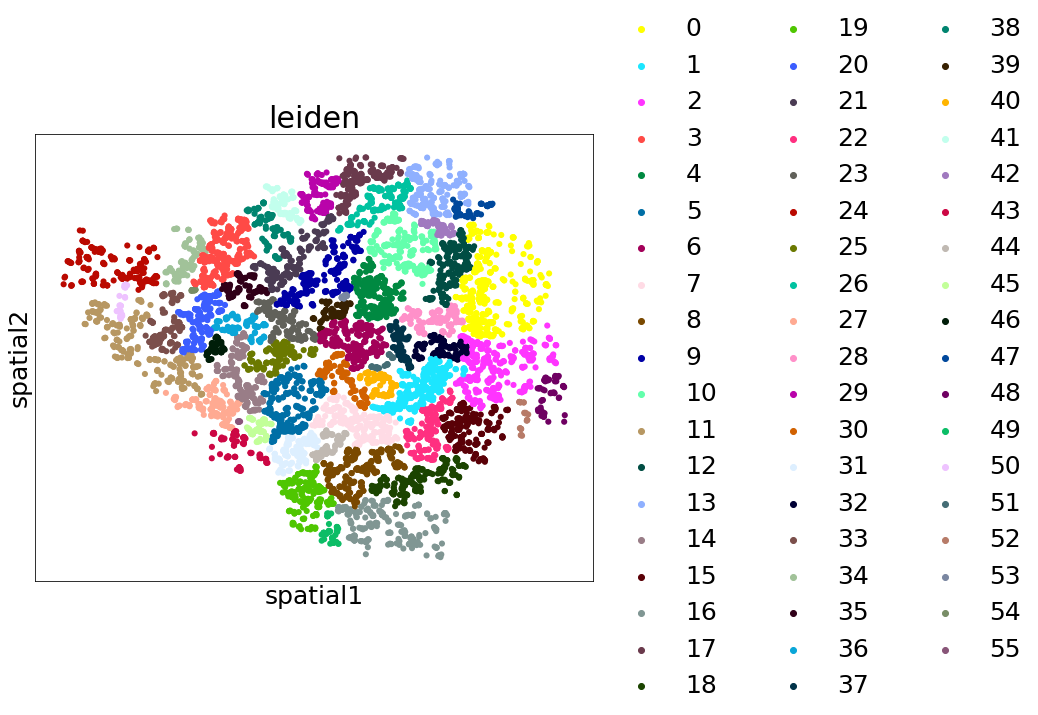

In [11]:
with rc_context({'figure.figsize': (10, 10), 'font.size': 25, 'axes.facecolor': '#ffffff00', 'axes.edgecolor':'#000000'}):
    sc.pl.spatial(adata, color=['leiden'], spot_size=5,save='u2os_cell20_patch.png')
# , save=' cell6 patches.png'

In [273]:
rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both',
          'axes.grid.which': 

In [12]:
adata.obs['gene_names'] = pd.Categorical(cell_df['gene'].tolist(), categories=np.unique(cell_df['gene'].tolist()))

In [13]:
adata

AnnData object with n_obs × n_vars = 11265 × 2
    obs: 'leiden', 'gene_names'
    uns: 'neighbors', 'leiden', 'leiden_colors'
    obsm: 'spatial'
    obsp: 'distances', 'connectivities'

In [14]:
cell_df.insert(6, 'patch', adata.obs['leiden'].tolist())
cell_df

Unnamed: 0          x          y     gene   cell  nucleus patch  \
8987774    10032644  791.55480  496.74130    THBS1  10-46       -1    15   
8988657    10033527  834.42053  466.81534    CKAP5  10-46       -1    18   
8988770    10033640  780.78674  566.79224    PRKDC  10-46       -1    48   
8989783    10034653  741.00903  523.49360      TPR  10-46       -1     2   
8990365    10035235  893.30570  461.05560     NKTR  10-46       -1    16   
...             ...        ...        ...      ...    ...      ...   ...   
9200786    10246079  722.33240  368.39655   MALAT1  10-46        2    23   
9200893    10246186  703.81310  395.26105  DNAJC13  10-46        2    39   
9201131    10246424  722.46220  368.18555   MALAT1  10-46        2    23   
9201300    10246593  699.71405  418.22000    CKAP5  10-46        2     4   
9201918    10247212  734.61590  377.86945   SPTBN1  10-46        2    25   

         batch  
8987774     46  
8988657     46  
8988770     46  
8989783     46  
8990365     46  
...        ...  
9200786     46  
9200893     46  
9201131     46  
9201300     46  
9201918     46  

[11265 rows x 8 columns]

In [15]:
exp_df = util.counting(cell_df, 'patch', 'gene')
patch_corr = exp_df.corr(method='pearson')

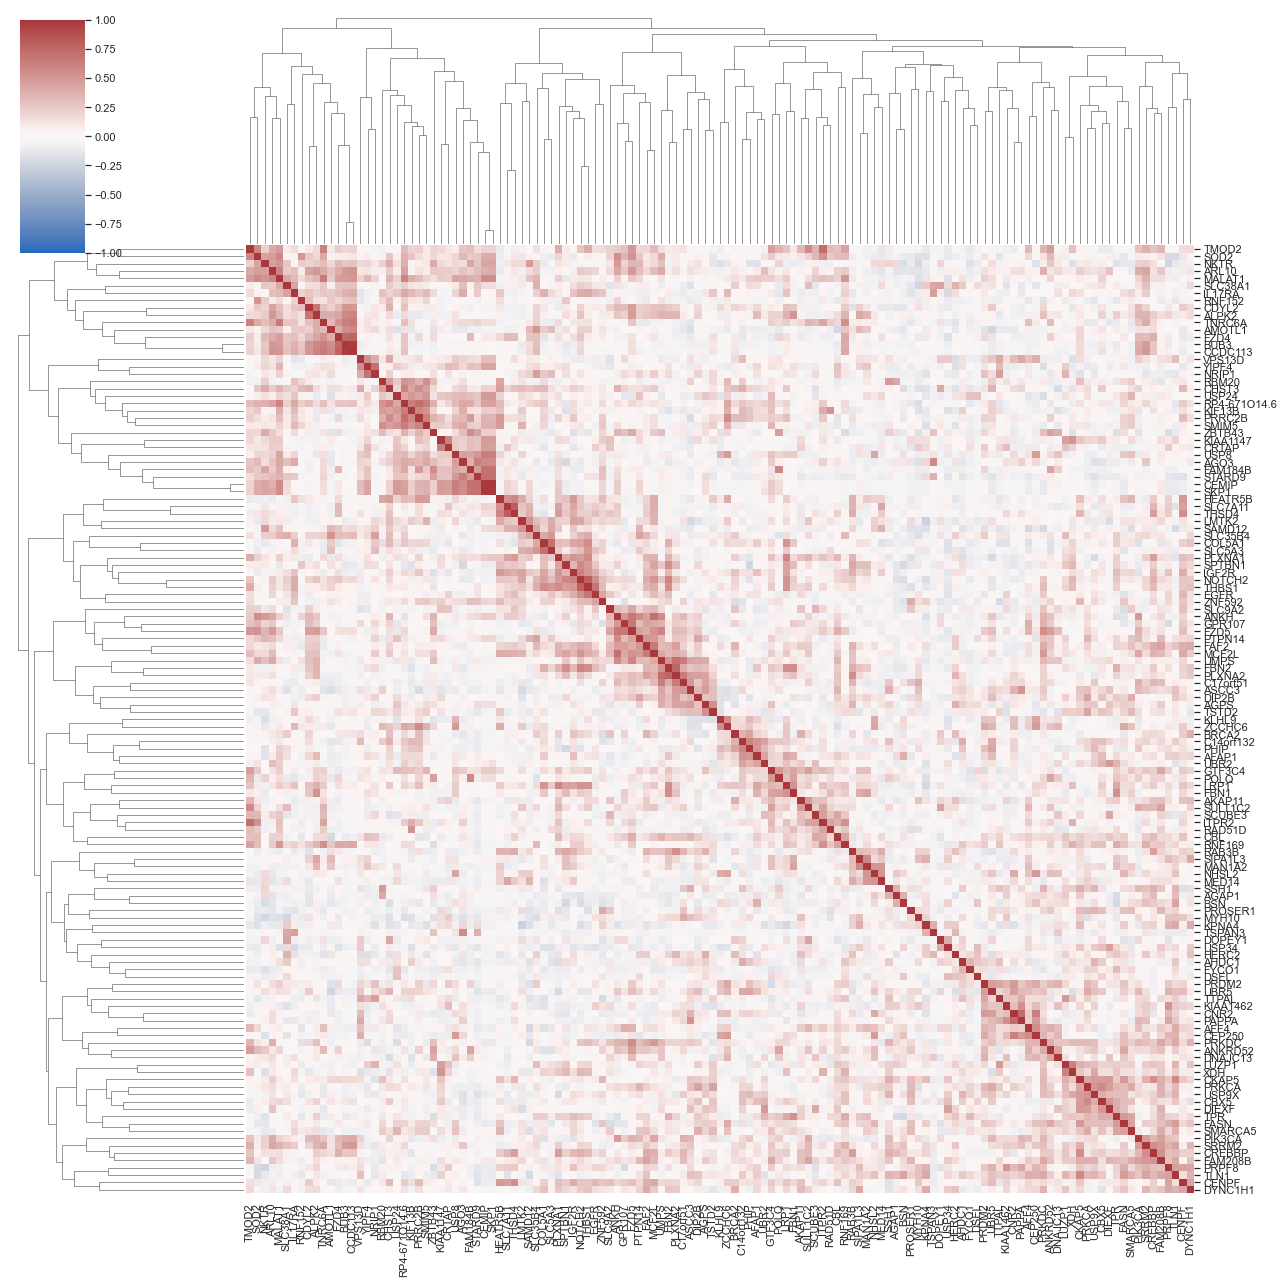

In [17]:
sns.set(font_scale=1.0)
sns.clustermap(patch_corr, figsize=(18,18), xticklabels=True, yticklabels=True, cmap='vlag', vmin=-1, vmax=1)
plt.savefig(r'.\figures\u2os patch correlation.png')

## Cell RNA-location plot

### cell06 visualization

In [73]:
groups = data.groupby('cellID')
cell_df = groups.get_group(6)

In [74]:
markers_l = np.unique(cell_df['geneName'].tolist())
np.random.seed(0)
shuffle(markers_l)

In [75]:
adata = sc.read_h5ad(filename=r'..\merfish_data\140gene_analysis\colored_adata\colored_merfish_cell_06_patches.h5ad')

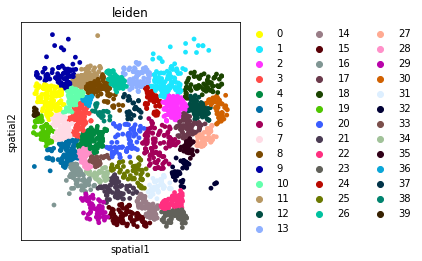

In [76]:
sc.pl.spatial(adata, color='leiden', spot_size=6)

In [80]:
comp_colors = util.get_complementary_colors()

In [47]:
cell_df.insert(8, 'patch', adata.obs['leiden'].tolist())
patch_colors = adata.uns['leiden_colors']

In [48]:
print(np.max(np.array(cell_df['wordCentroidY'].tolist())))
print(np.min(-np.array(cell_df['wordCentroidX'].tolist())))

245.482669686915
-248.957616137041


KeyError: 'patch'

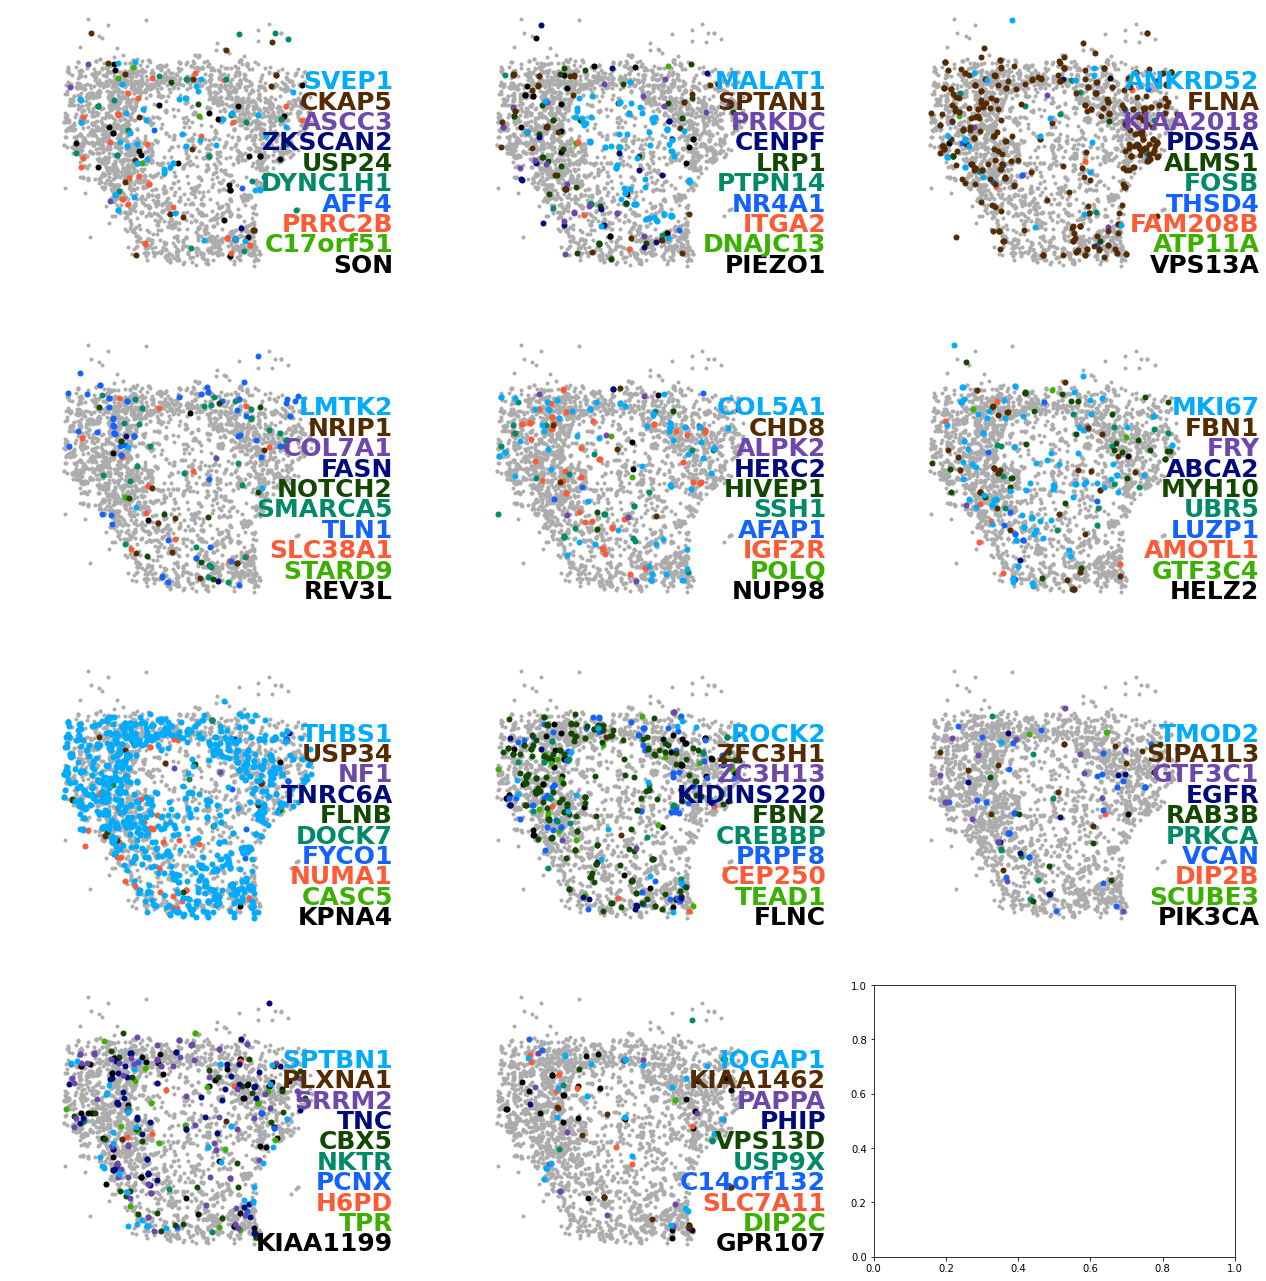

In [81]:
fig, axes = plt.subplots(4, 3, figsize=(22,23))
# fig.tight_layout()
axes = axes.flatten()
groups = cell_df.groupby('geneName')
for i in range(11):
    ax = axes[i]
    ax.plot(np.array(cell_df['wordCentroidY'].tolist()),-np.array(cell_df['wordCentroidX'].tolist()),
            '.',color='#acacac',markersize=6)
    colored = markers_l[i*10:(i+1)*10]
    for j in range(len(colored)):
        gene = colored[j]
        color = comp_colors[j]
        gene_sub = groups.get_group(gene)
        ax.plot(np.array(gene_sub['wordCentroidY'].tolist()),-np.array(gene_sub['wordCentroidX'].tolist()),
                '.',color=color,markersize=10)
        ax.text(325,-255+(j*(20)), s=gene, fontsize=25, fontweight='bold', color=color, horizontalalignment='right')
    
    ax.axis('equal')
    ax.axis('off')

for i in range(11):
    ax = axes[i]

ax = axes[11]
patch_group = cell_df.groupby('patch')
for i in range(len(patch_colors)):
    patch_sub = patch_group.get_group(str(i))
    color = patch_colors[i]
    ax.plot(np.array(patch_sub['wordCentroidY'].tolist()),-np.array(patch_sub['wordCentroidX'].tolist()),
            '.',color=color,markersize=10)
ax.axis('equal')
ax.axis('off')
        
fig.tight_layout(w_pad=0.6)
# plt.savefig(r'.\figures\merfish cell6 scatter comp colors.png')
plt.show()

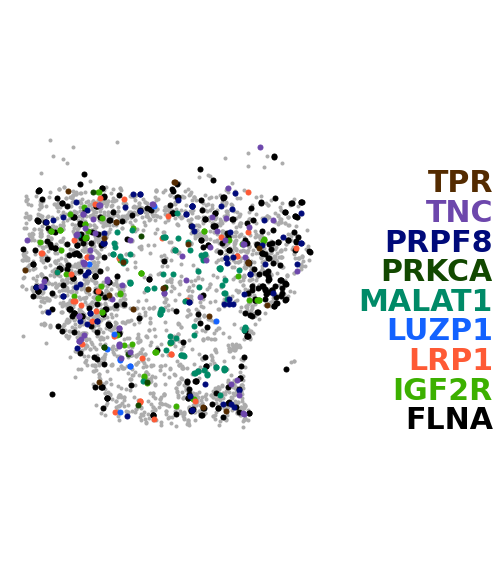

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
# fig.tight_layout()
groups = cell_df.groupby('geneName')
colored = ['FLNA','PRPF8','TPR','MALAT1','TNC','PRKCA','LUZP1','IGF2R','LRP1']
colored.sort()

ax.plot(np.array(cell_df['wordCentroidY'].tolist()),-np.array(cell_df['wordCentroidX'].tolist()),
        '.',color='#acacac',markersize=6)
for j in range(len(colored)):
    gene = colored[j]
    color = comp_colors[j]
    gene_sub = groups.get_group(gene)
    ax.plot(np.array(gene_sub['wordCentroidY'].tolist()),-np.array(gene_sub['wordCentroidX'].tolist()),
            '.',color=color,markersize=10)
    ax.text(400,-250+(j*(25)), s=gene, fontsize=30, fontweight='bold', color=color, horizontalalignment='right')

ax.axis('equal')
ax.axis('off')

fig.tight_layout(w_pad=0.6)
plt.savefig(r'.\figures\merfish cell6 scatter comp colors main fig.png')
plt.show()

### cell15 visualization

In [59]:
groups = data.groupby('cellID')
cell_df = groups.get_group(15)

In [60]:
markers_l = np.unique(cell_df['geneName'].tolist())
np.random.seed(0)
shuffle(markers_l)

In [61]:
len(markers_l)

99

In [62]:
adata = sc.read_h5ad(filename=r'..\merfish_data\140gene_analysis\colored_adata\colored_merfish_cell_15_patches.h5ad')

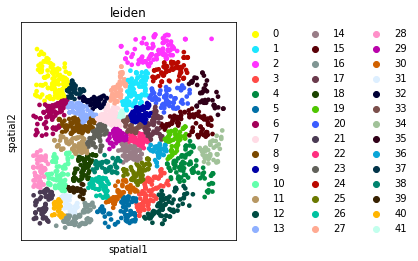

In [63]:
sc.pl.spatial(adata, color='leiden', spot_size=6)

In [64]:
cell_df.insert(8, 'patch', adata.obs['leiden'].tolist())
patch_colors = adata.uns['leiden_colors']

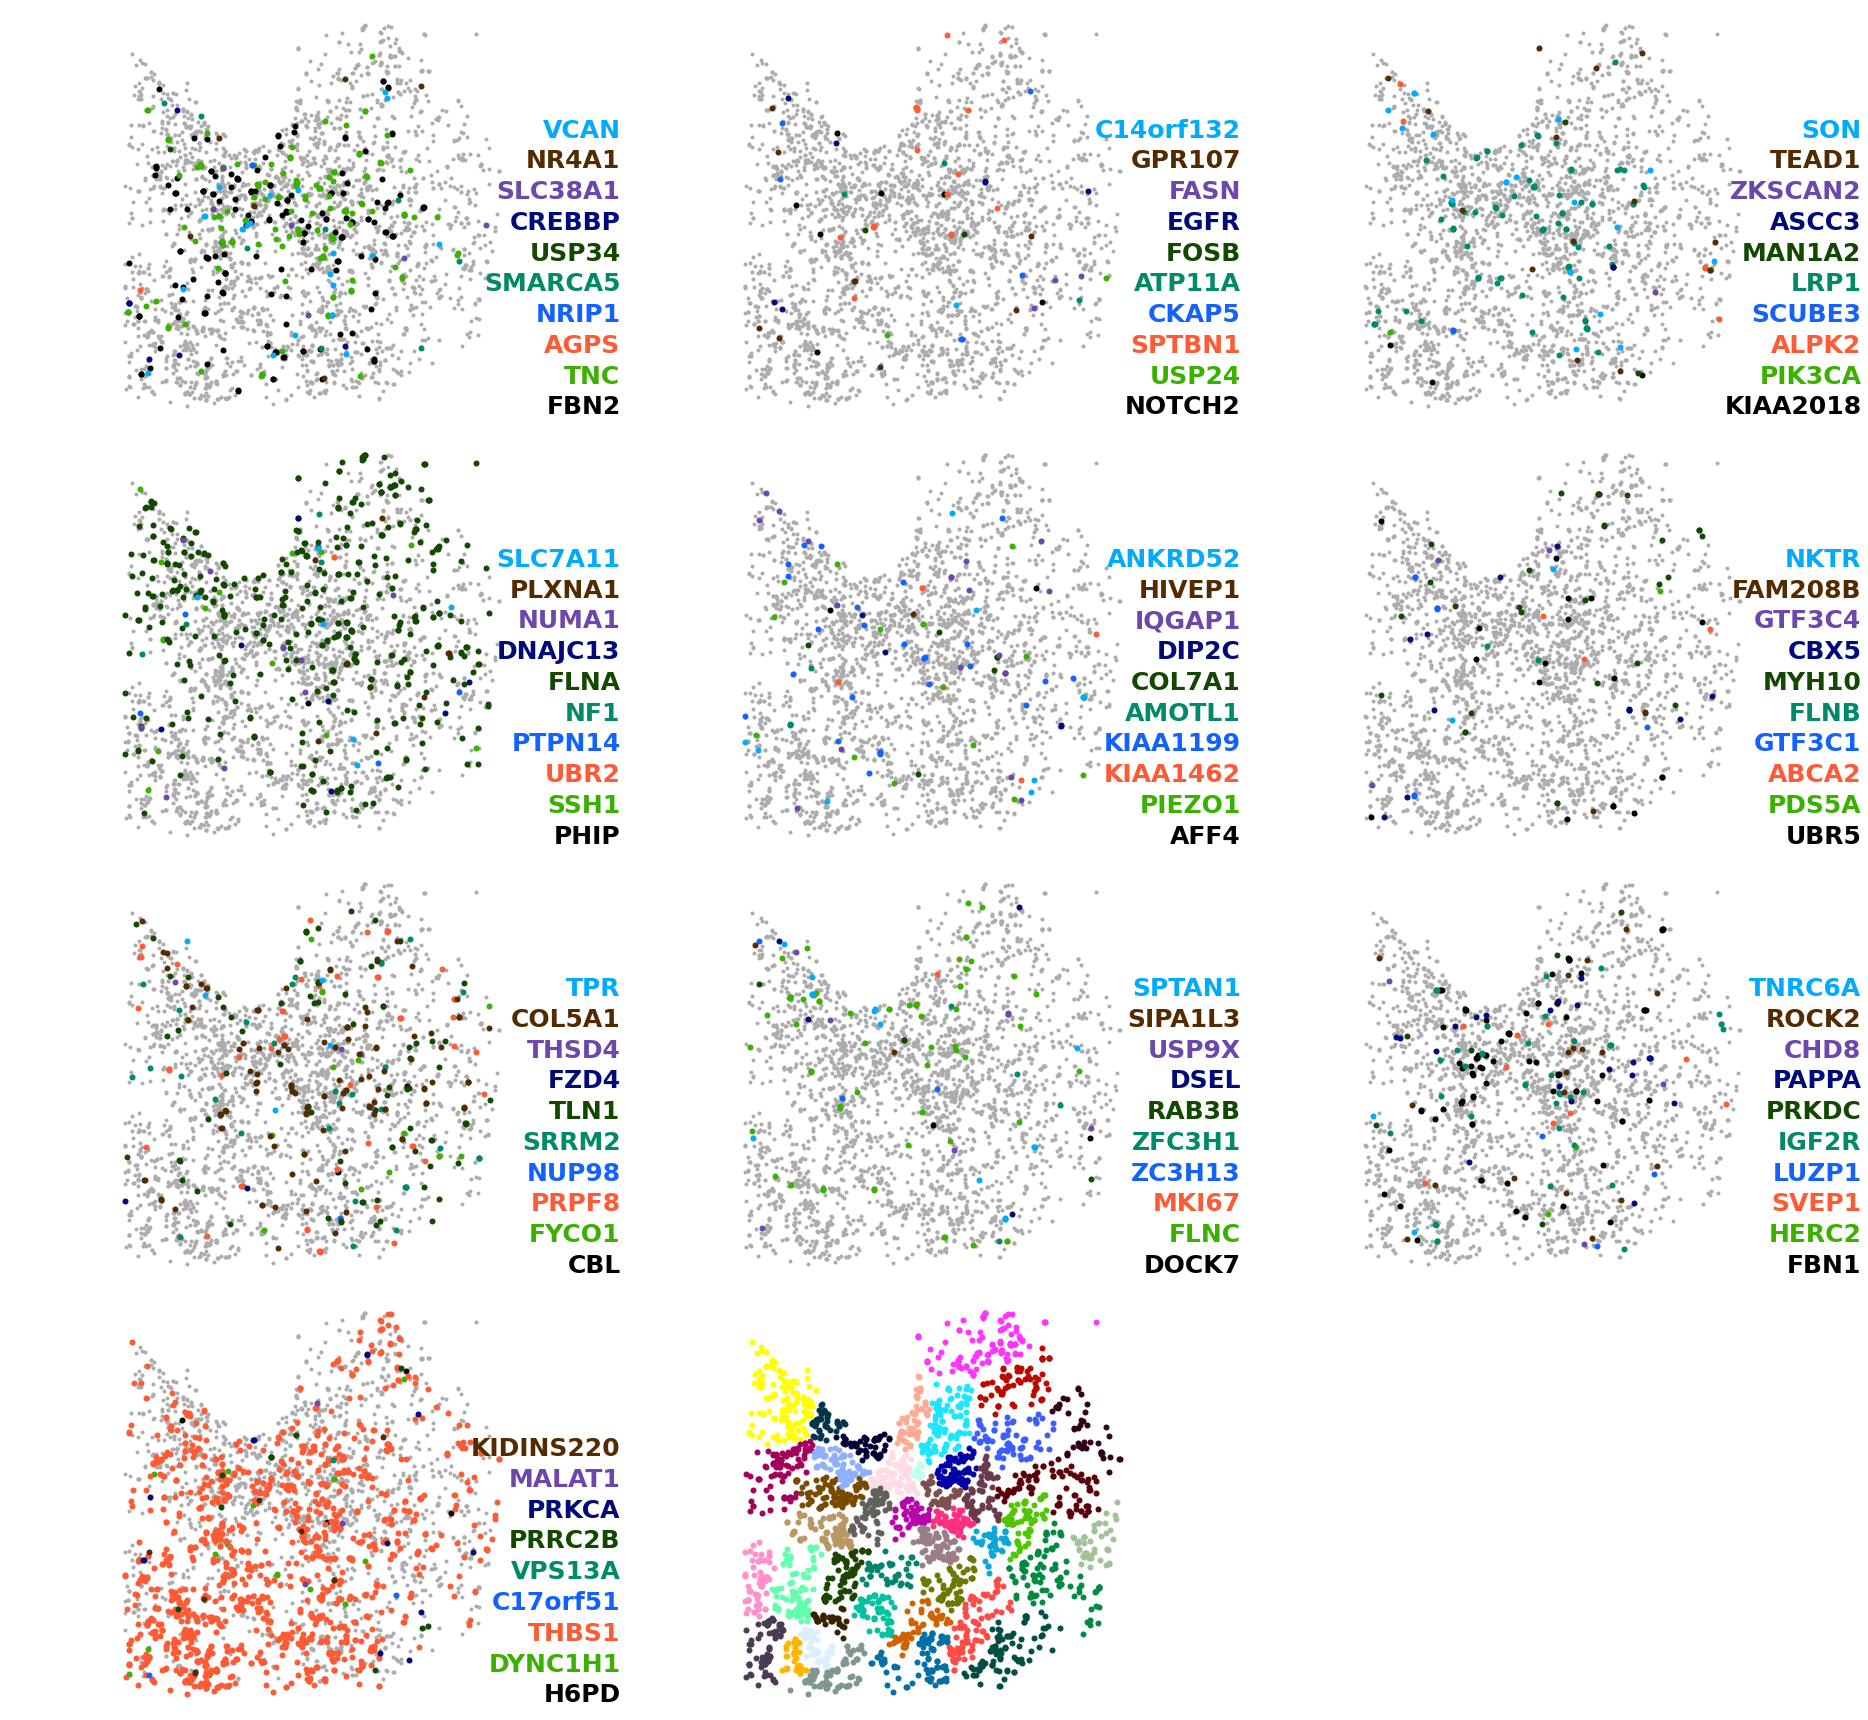

In [72]:
fig, axes = plt.subplots(4, 3, figsize=(26,24))
# fig.tight_layout()
axes = axes.flatten()
groups = cell_df.groupby('geneName')
for i in range(10):
    ax = axes[i]
    ax.plot(np.array(cell_df['wordCentroidY'].tolist()),-np.array(cell_df['wordCentroidX'].tolist()),
            '.',color='#acacac',markersize=6)
    colored = markers_l[i*10:(i+1)*10]
    for j in range(len(colored)):
        gene = colored[j]
        color = comp_colors[j]
        gene_sub = groups.get_group(gene)
        ax.plot(np.array(gene_sub['wordCentroidY'].tolist()),-np.array(gene_sub['wordCentroidX'].tolist()),
                '.',color=color,markersize=10)
        ax.text(325,-255+(j*(20)), s=gene, fontsize=25, fontweight='bold', color=color, horizontalalignment='right')
    
    ax.axis('equal')
    ax.axis('off')

for i in range(11):
    ax = axes[i]

ax = axes[10]
patch_group = cell_df.groupby('patch')
for i in range(len(patch_colors)):
    patch_sub = patch_group.get_group(str(i))
    color = patch_colors[i]
    ax.plot(np.array(patch_sub['wordCentroidY'].tolist()),-np.array(patch_sub['wordCentroidX'].tolist()),
            '.',color=color,markersize=10)
ax.axis('equal')
ax.axis('off')

axes[11].axis('off')
        
fig.tight_layout()
plt.savefig(r'.\figures\merfish cell15 scatter comp colors.png')
plt.show()

## All cell patch detection with 140 genes

In [29]:
groups = data.groupby('cell')
adata_dir = r'..\results\bento_u2os\patch_adata'
patch_corr_dir = r'..\results\bento_u2os\patch_corr'
cell_df_dir = r'..\results\bento_u2os\cell_dfs'
for item in tqdm(np.unique(data['cell'].tolist())):
    
    # Extract dataframe of the cell
    cell_df = groups.get_group(item)
    
    # Convert to AnnData object, conduct clustering analysis
    l = np.vstack((cell_df['x'], cell_df['y'])).T
    adata = sc.AnnData(l)
    adata.var_name = ['x','y']
    adata.obsm['spatial'] = np.vstack((cell_df['y'], cell_df['x'])).T
    
    # Leiden to detect patches
    sc.pp.neighbors(adata)
    sc.tl.leiden(adata, resolution=0.1)
    
    # Update the cell_df with patch information, count and compute correlation
    cell_df.insert(cell_df.shape[1], 'patch', adata.obs['leiden'].tolist())
    exp_df = util.counting(cell_df, 'patch', 'gene')
    patch_corr = exp_df.corr(method='pearson')
    
    # Save AnnData object in h5ad, save patch_count, patch_corr, cell dataframe in pickle
    # if item < 10:
    #     cell_num = '0' + str(item)
    # else:
    cell_num = item
    anndata_name = r'merfish_u2os_'+cell_num+'_patches.h5ad'
    adata.write(filename=os.path.join(adata_dir, anndata_name))
    corr_name = r'merfish_u2os_'+cell_num+'_exp_corr.pkl'
    pickle.dump({'expression': exp_df, 'correlation': patch_corr}, open(os.path.join(patch_corr_dir,corr_name), 'wb'))
    cell_df_name = r'merfish_u2os_'+cell_num+'_cell.pkl'
    pickle.dump(cell_df, open(os.path.join(cell_df_dir,cell_df_name), 'wb'))

100%|██████████████████████████████████████████████████████████████████████████████| 1022/1022 [30:42<00:00,  1.80s/it]


## Patch detection with varying number of genes

In [53]:
out_dir = r'..\merfish_data\140gene_example_analysis\patch_gene_num\results'

In [54]:
groups = data.groupby('cellID')
cell_df = groups.get_group(6)

In [55]:
cell_df = cell_df.reset_index()
cell_df

index  Unnamed: 0  intCodeword geneName  isExactMatch  isCorrectedMatch  \
0     15259       48859         9731    SRRM2             0                 1   
1     15260       48860         1027    PRPF8             0                 1   
2     15261       48861        10755    SRRM2             0                 1   
3     15262       48863        35345     FLNA             0                 1   
4     15263       48864         2577     FLNA             1                 0   
...     ...         ...          ...      ...           ...               ...   
3280  18539       57853        33284     FLNB             0                 1   
3281  18540       57855        36360      TNC             0                 1   
3282  18541       57857        40967    ITGA2             0                 1   
3283  18542       57859        35336      TNC             1                 0   
3284  18543       57860        36354    THBS1             0                 1   

      imageX  imageY  wordCentroidX  wordCentroidY  cellID  
0     -175.3   -19.9      48.627865     115.566390       6  
1     -175.3   -19.9      56.797554     133.948413       6  
2     -175.3   -19.9      57.001046     153.922772       6  
3     -175.3   -19.9      65.761847     154.294510       6  
4     -175.3   -19.9      68.122284     165.019758       6  
...      ...     ...            ...            ...     ...  
3280  -175.3   -19.9     143.161943     213.128133       6  
3281  -175.3   -19.9     180.022770      84.371306       6  
3282  -175.3   -19.9     198.764621      86.964836       6  
3283  -175.3   -19.9     212.483146     178.962764       6  
3284  -175.3   -19.9     230.889179     176.647328       6  

[3285 rows x 11 columns]

In [56]:
genes = np.unique(cell_df['geneName'].tolist())

np.random.seed(0)
shuffle(genes)

In [10]:
# # find subframes of 100 genes, 50 genes, and 10 genes
# idx100 = [i for i, item in enumerate(cell_df['geneName'].tolist()) if not item in genes[:100]]
# gene100_df = cell_df.drop(index=idx100, inplace=False)

# idx50 = [i for i, item in enumerate(cell_df['geneName'].tolist()) if not item in genes[:50]]
# gene50_df = cell_df.drop(index=idx50, inplace=False)

# idx10 = [i for i, item in enumerate(cell_df['geneName'].tolist()) if not item in genes[:10]]
# gene10_df = cell_df.drop(index=idx10, inplace=False)

In [11]:
# adata100 = sc.AnnData(np.vstack((gene100_df['wordCentroidX'], gene100_df['wordCentroidY'])).T)
# adata100.var_name = ['x','y']
# adata100.obsm['spatial'] = np.vstack((gene100_df['wordCentroidY'], gene100_df['wordCentroidX'])).T

In [12]:
# sc.pp.neighbors(adata100)

In [13]:
# sc.tl.leiden(adata100, resolution=1)

In [14]:
# with rc_context({'figure.figsize': (10, 10), 'font.size': 30}):
#     sc.pl.spatial(adata100, color='leiden', spot_size=6, save=' 100 gene patches.png')

In [15]:
# gene_names = pd.Categorical(gene100_df['geneName'].tolist(), categories=np.unique(gene100_df['geneName'].tolist()))
# adata100.obs['gene_names'] = gene_names

In [16]:
# adata100.write(filename=os.path.join(out_dir, '100_marker_patches.h5ad'))

In [17]:
# gene100_df.insert(8, 'patch', adata100.obs['leiden'].tolist())

In [18]:
# pickle.dump(gene100_df, open(os.path.join(out_dir,'100_gene_df.pkl'), 'wb'))

In [19]:
# adata50 = sc.AnnData(np.vstack((gene50_df['wordCentroidX'], gene50_df['wordCentroidY'])).T)
# adata50.var_name = ['x','y']
# adata50.obsm['spatial'] = np.vstack((gene50_df['wordCentroidY'], gene50_df['wordCentroidX'])).T

In [20]:
# sc.pp.neighbors(adata50)

In [21]:
# sc.tl.leiden(adata50, resolution=1)

In [22]:
# with rc_context({'figure.figsize': (10, 10), 'font.size':30}):
#     sc.pl.spatial(adata50, color='leiden', spot_size=6, save=' 50 gene patches.png')

In [23]:
# gene_names = pd.Categorical(gene50_df['geneName'].tolist(), categories=np.unique(gene50_df['geneName'].tolist()))
# adata50.obs['gene_names'] = gene_names

In [24]:
# adata50.write(filename=os.path.join(out_dir, '50_marker_patches.h5ad'))

In [25]:
# gene50_df.insert(8, 'patch', adata50.obs['leiden'].tolist())

In [26]:
# pickle.dump(gene50_df, open(os.path.join(out_dir,'50_gene_df.pkl'), 'wb'))

In [27]:
# adata10 = sc.AnnData(np.vstack((gene10_df['wordCentroidX'], gene10_df['wordCentroidY'])).T)
# adata10.var_name = ['x','y']
# adata10.obsm['spatial'] = np.vstack((gene10_df['wordCentroidY'], gene10_df['wordCentroidX'])).T

In [28]:
# sc.pp.neighbors(adata10)

In [29]:
# sc.tl.leiden(adata10, resolution=1)

In [30]:
# with rc_context({'figure.figsize': (10, 10), 'font.size': 30}):
    # sc.pl.spatial(adata10, color='leiden', spot_size=6, save=' 10 gene patches.png')

In [31]:
# gene_names = pd.Categorical(gene10_df['geneName'].tolist(), categories=np.unique(gene10_df['geneName'].tolist()))
# adata10.obs['gene_names'] = gene_names

In [32]:
# adata10.write(filename=os.path.join(out_dir, '10_marker_patches.h5ad'))

In [33]:
# gene10_df.insert(8, 'patch', adata10.obs['leiden'].tolist())

In [34]:
# pickle.dump(gene10_df, open(os.path.join(out_dir,'10_gene_df.pkl'), 'wb'))

In [57]:
cell_df

index  Unnamed: 0  intCodeword geneName  isExactMatch  isCorrectedMatch  \
0     15259       48859         9731    SRRM2             0                 1   
1     15260       48860         1027    PRPF8             0                 1   
2     15261       48861        10755    SRRM2             0                 1   
3     15262       48863        35345     FLNA             0                 1   
4     15263       48864         2577     FLNA             1                 0   
...     ...         ...          ...      ...           ...               ...   
3280  18539       57853        33284     FLNB             0                 1   
3281  18540       57855        36360      TNC             0                 1   
3282  18541       57857        40967    ITGA2             0                 1   
3283  18542       57859        35336      TNC             1                 0   
3284  18543       57860        36354    THBS1             0                 1   

      imageX  imageY  wordCentroidX  wordCentroidY  cellID  
0     -175.3   -19.9      48.627865     115.566390       6  
1     -175.3   -19.9      56.797554     133.948413       6  
2     -175.3   -19.9      57.001046     153.922772       6  
3     -175.3   -19.9      65.761847     154.294510       6  
4     -175.3   -19.9      68.122284     165.019758       6  
...      ...     ...            ...            ...     ...  
3280  -175.3   -19.9     143.161943     213.128133       6  
3281  -175.3   -19.9     180.022770      84.371306       6  
3282  -175.3   -19.9     198.764621      86.964836       6  
3283  -175.3   -19.9     212.483146     178.962764       6  
3284  -175.3   -19.9     230.889179     176.647328       6  

[3285 rows x 11 columns]

In [52]:
adata_l = []
sub_df_l = []
for i in tqdm(range(10)):
    idx = []
    gene_list = genes[:(10*(i+1))]
    for i, item in enumerate(cell_df['geneName'].tolist()):
        if not item in gene_list:
            idx.append(i)
    sub_df = cell_df.drop(index=idx, inplace=False)
    adata = None
    adata = sc.AnnData(np.vstack((sub_df['wordCentroidX'], sub_df['wordCentroidY'])).T)
    adata.var_name = ['x','y']
    adata.obsm['spatial'] = np.vstack((sub_df['wordCentroidY'], sub_df['wordCentroidX'])).T
    
    sc.pp.neighbors(adata)
    
    sc.tl.leiden(adata, resolution=1)
    
    gene_names= pd.Categorical(sub_df['geneName'].tolist(), categories=np.unique(sub_df['geneName'].tolist()))
    adata.obs['gene_names'] = gene_names
    
    adata.write(filename=os.path.join(out_dir, str(i*10)+'_marker_patches.h5ad'))
    adata_l.append(adata)
    
    sub_df.insert(8, 'patch', adata.obs['leiden'].tolist())
    pickle.dump(sub_df, open(os.path.join(out_dir,str(i*10)+'_gene_df.pkl'), 'wb'))
    sub_df_l.append(sub_df)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.93it/s]


In [60]:
for i in range(10):
    adata_l[i].write(filename=os.path.join(out_dir, str((i+1)*10)+'_marker_patches.h5ad'))

In [61]:
for i in range(10):
    with open(os.path.join(out_dir, str((i+1)*10)+'_marker_sub_df.pkl'),'wb') as f:
        pickle.dump(sub_df_l[i],f)

### Patch assignment mismatch

In [39]:
from sklearn.metrics import rand_score

In [41]:
fig_out = r'..\merfish_data\140gene_example_analysis\patch_gene_num\figures'

In [42]:
# gene100_df

In [43]:
# gene50_df

In [44]:
# gene10_df

In [45]:
# idx10_100 = [i for i, item in enumerate(gene100_df['geneName'].tolist()) if not item in genes[:10]]
# gene100_10sub = gene100_df.reset_index()
# gene100_10sub = gene100_10sub.drop(index=idx10_100, inplace=False)

# idx10_50 = [i for i, item in enumerate(gene50_df['geneName'].tolist()) if not item in genes[:10]]
# gene50_10sub = gene50_df.reset_index()
# gene50_10sub = gene50_10sub.drop(index=idx10_50, inplace=False)

In [46]:
# gene100_patches = gene100_10sub['patch'].tolist()
# gene50_patches = gene50_10sub['patch'].tolist()
# gene10_patches = gene10_df['patch'].tolist()

In [47]:
# print(rand_score(gene50_patches, gene100_patches))
# print(rand_score(gene10_patches, gene100_patches))

In [48]:
print(len(curr_patch))
print(len(prev_patch))

NameError: name 'curr_patch' is not defined

In [49]:
rand_l = []

for i in range(9):
    prev = sub_df_l[i]
    curr = sub_df_l[i+1]
    
    genes_list = np.unique(prev['geneName'].tolist())
    sub_idx = [i for i, item in enumerate(curr['geneName'].tolist()) if not item in genes_list]
    curr_sub = curr.reset_index()
    curr_sub = curr_sub.drop(index=sub_idx, inplace=False)
    
    curr_patch = curr_sub['patch'].tolist()
    prev_patch = prev['patch'].tolist()
    
    rand = rand_score(curr_patch, prev_patch)
    rand_l.append(rand)
    
    print('Gene patch assignment matching of '+str(10*(i+2))+' and '+str(10*(i+1))+' Rand score: '+str(rand))

Gene patch assignment matching of 20 and 10 Rand score: 0.9435714285714286
Gene patch assignment matching of 30 and 20 Rand score: 0.9565247323672162
Gene patch assignment matching of 40 and 30 Rand score: 0.9817454867310657
Gene patch assignment matching of 50 and 40 Rand score: 0.9819653989612634
Gene patch assignment matching of 60 and 50 Rand score: 0.9739925923173164
Gene patch assignment matching of 70 and 60 Rand score: 0.9778713700670142
Gene patch assignment matching of 80 and 70 Rand score: 0.9782364027557765
Gene patch assignment matching of 90 and 80 Rand score: 0.9953633483976145
Gene patch assignment matching of 100 and 90 Rand score: 0.9839831267178565


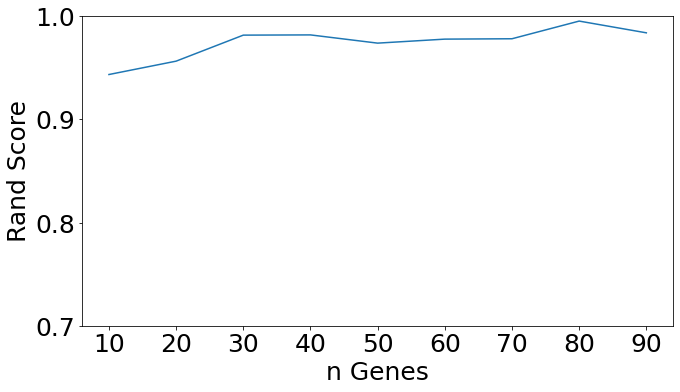

In [50]:
t = np.arange(10, 100, 10)
with rc_context({'figure.figsize': (10,6), 'font.size': 25}):
    plt.plot(t, rand_l)
    plt.ylim(0.7,1.0)
    plt.xlabel('n Genes')
    plt.xticks(t)
    plt.ylabel('Rand Score')
    plt.tight_layout()
    plt.savefig(os.path.join(fig_out, 'cluster assignment mismatch comparison.png'))
    plt.show()

## Patch correlation comparison

In [107]:
exp_df_l = []
corr_l = []
for item in sub_df_l:
    exp_df = counting(item, 'patch')
    exp_df_l.append(exp_df)
    
    patch_corr = exp_df.corr(method='pearson')
    corr_l.append(patch_corr)

NameError: name 'sub_df_l' is not defined

C:\Users\zfang38\Anaconda3\envs\scenv\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


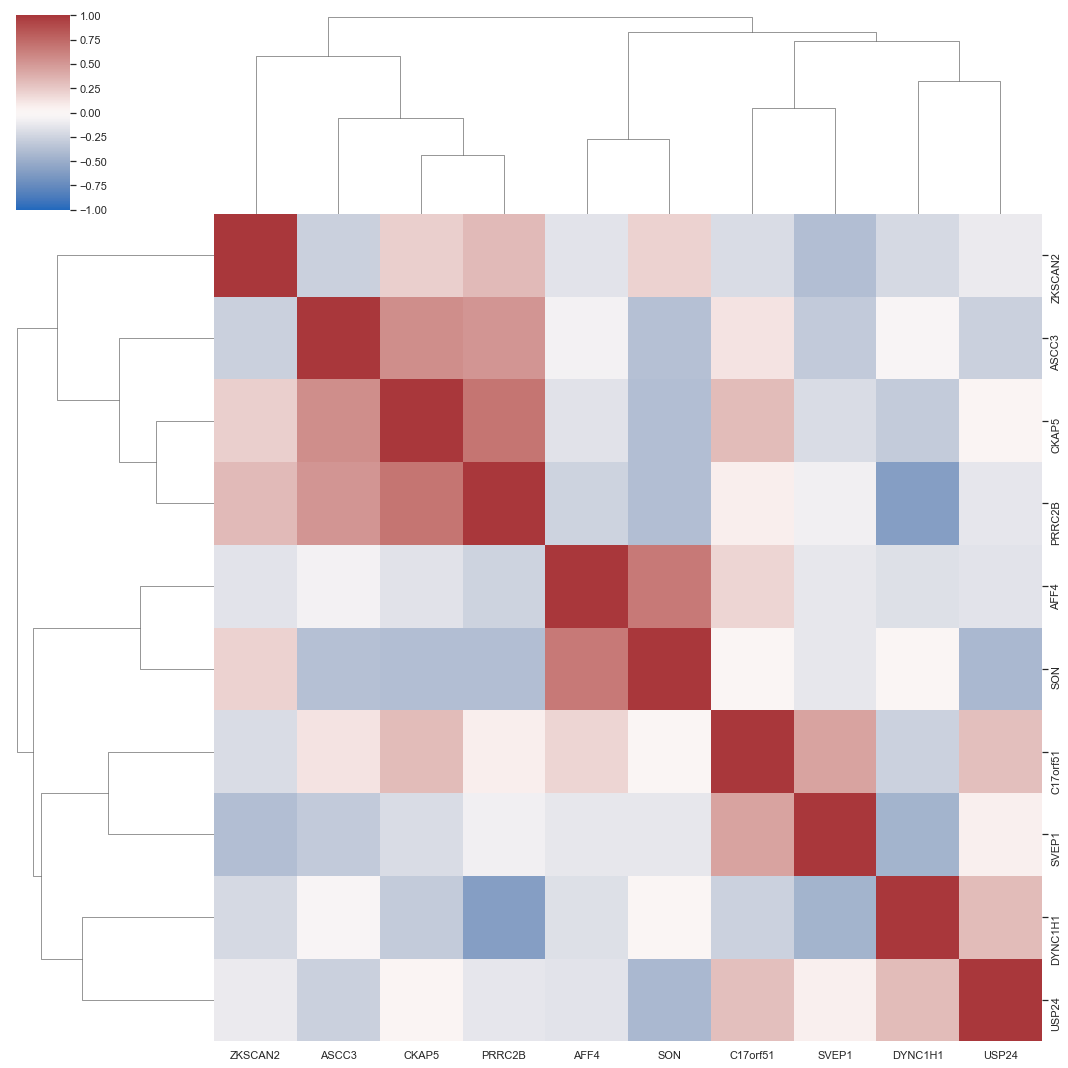

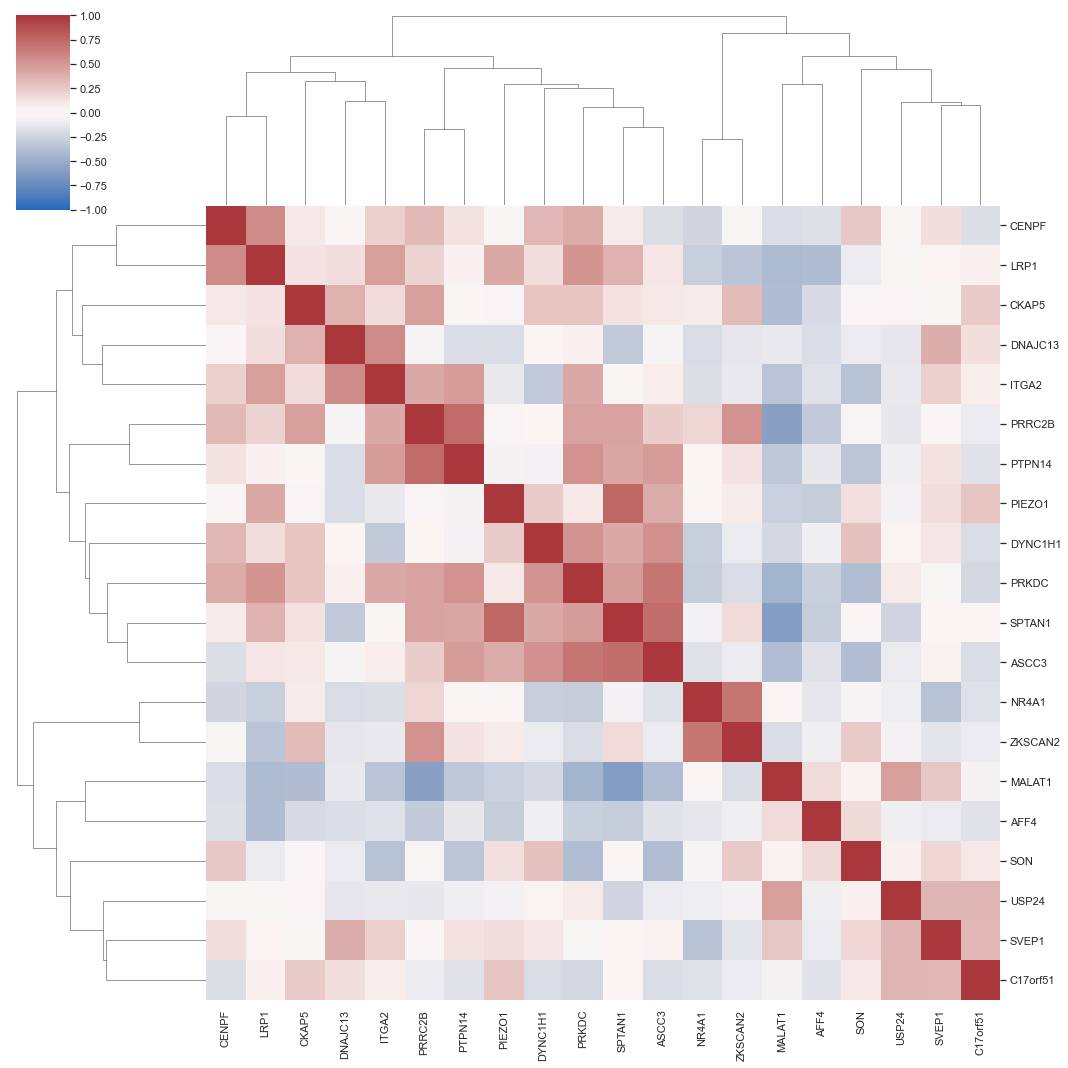

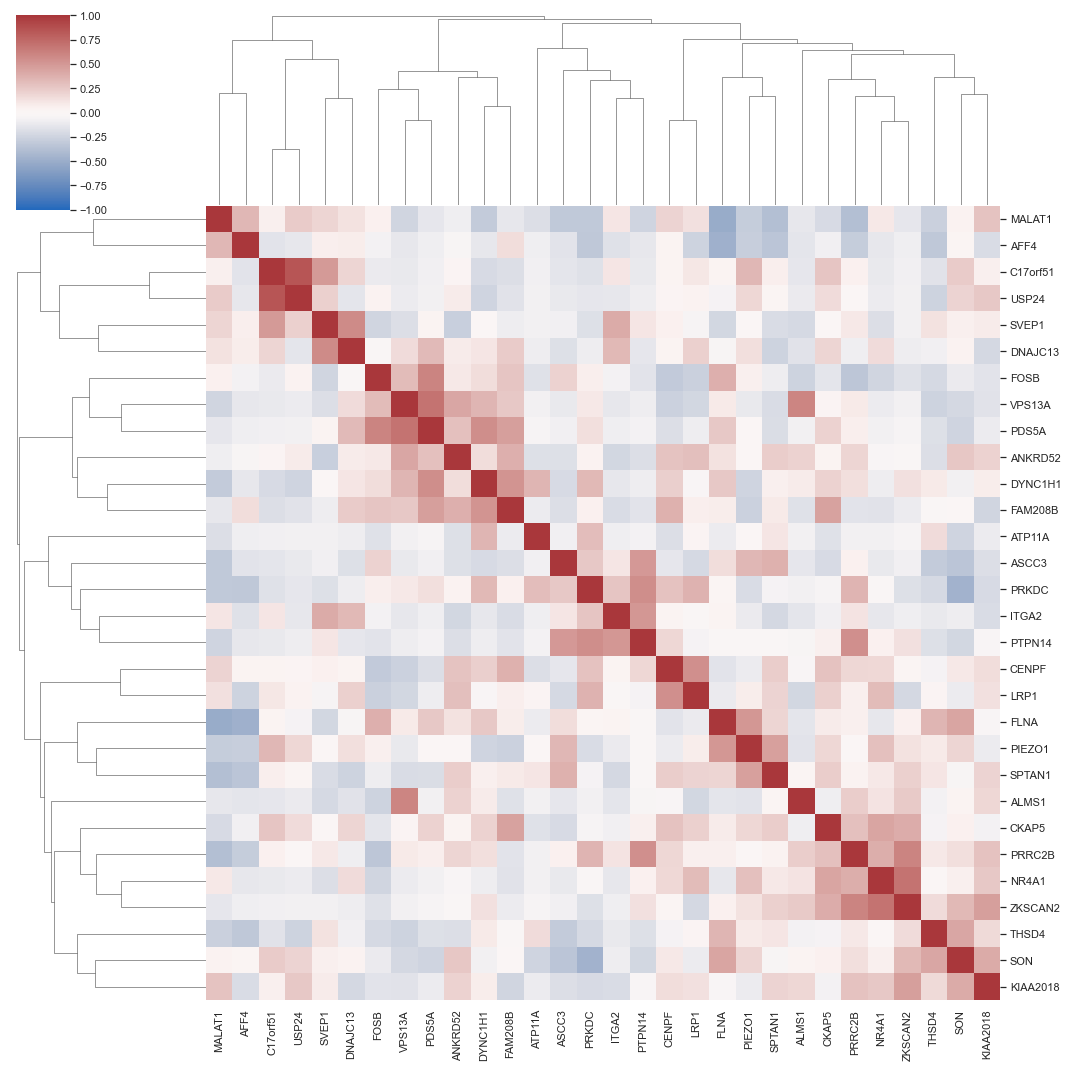

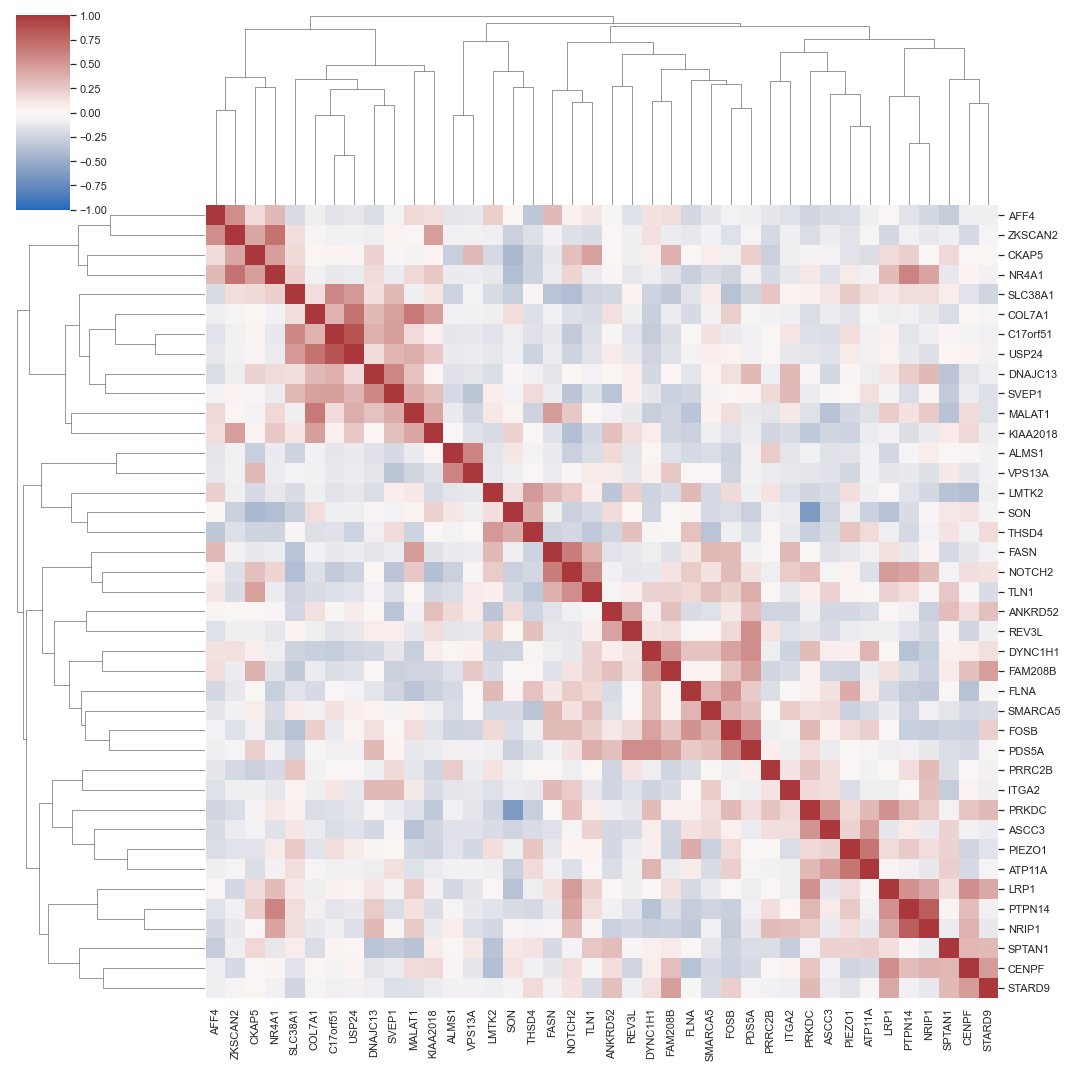

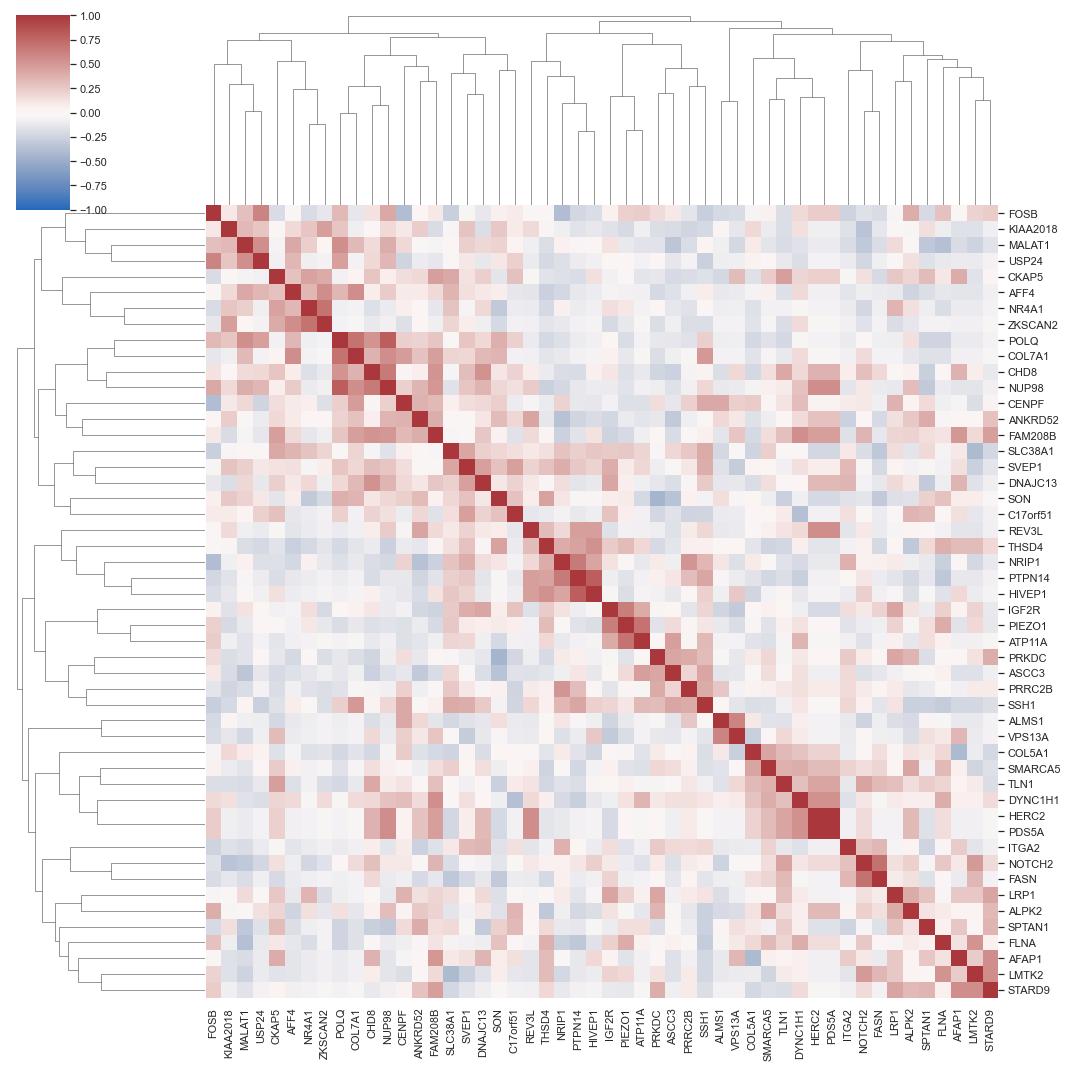

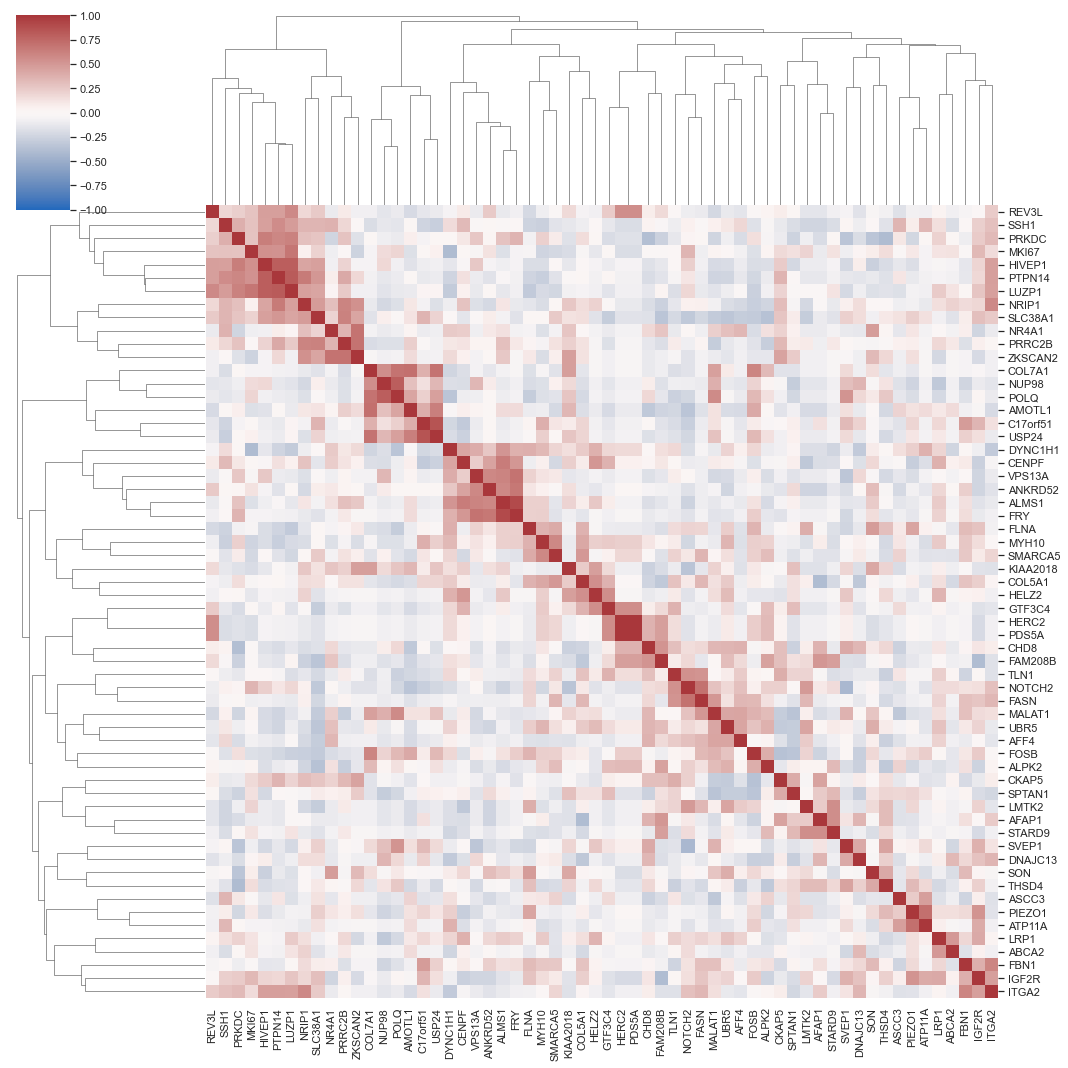

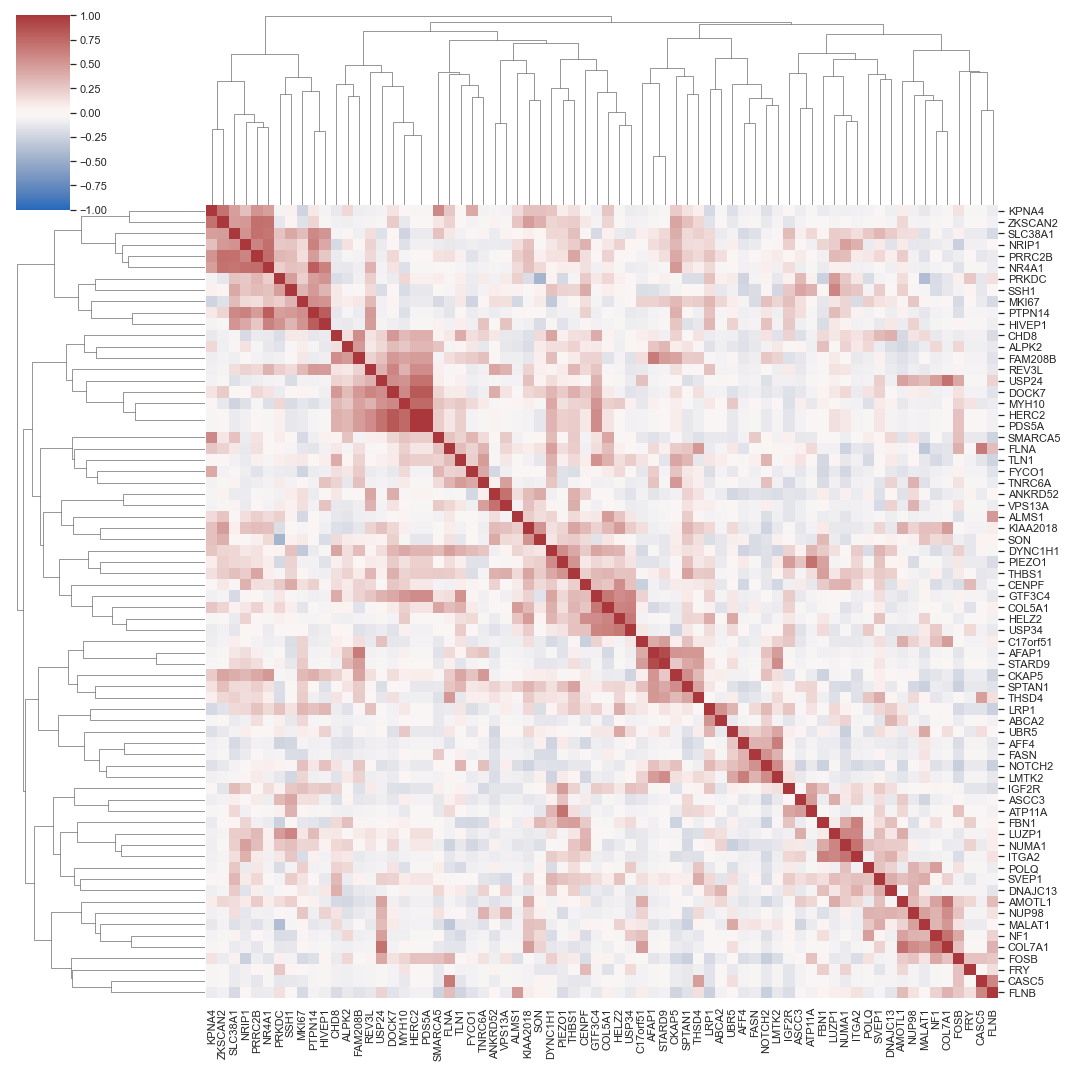

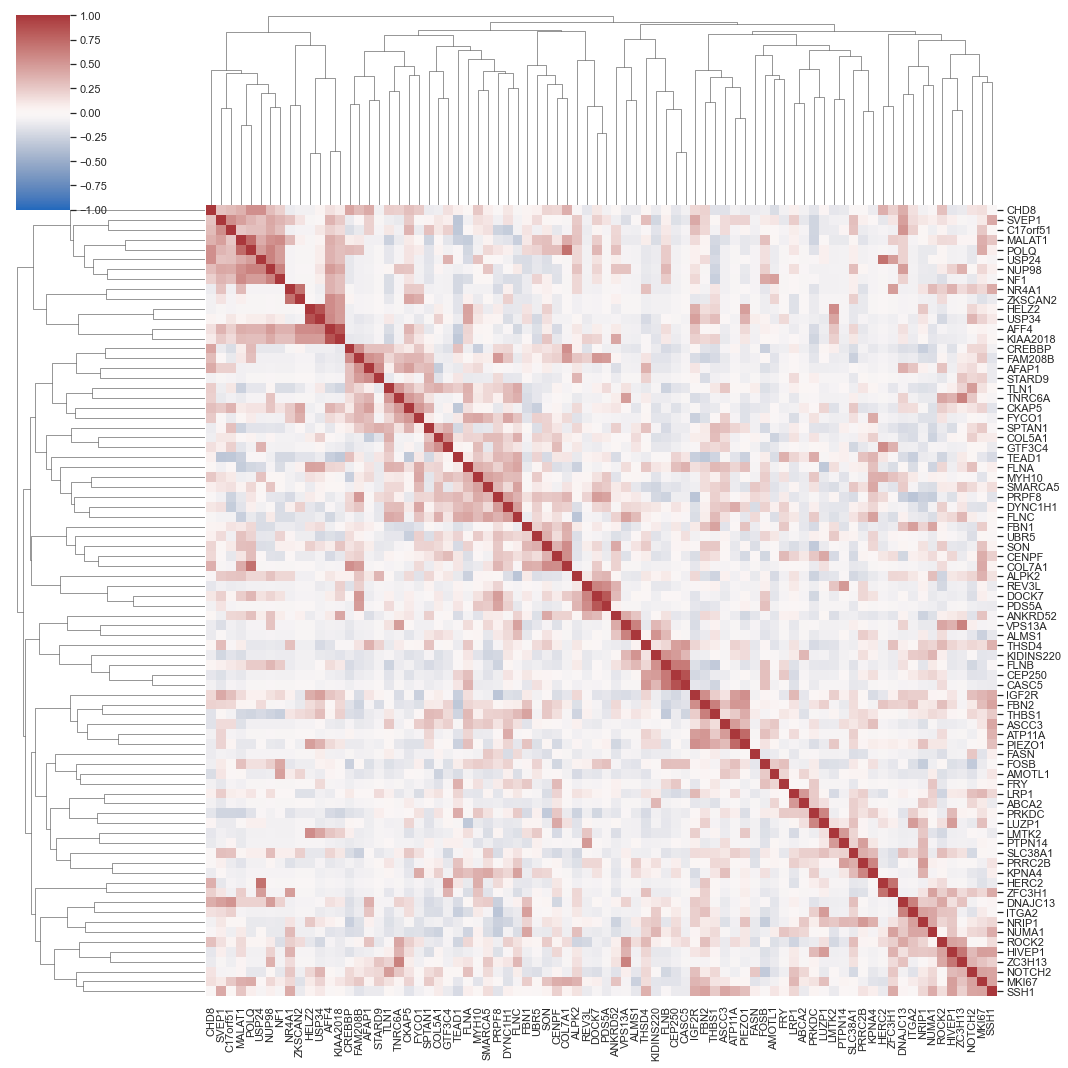

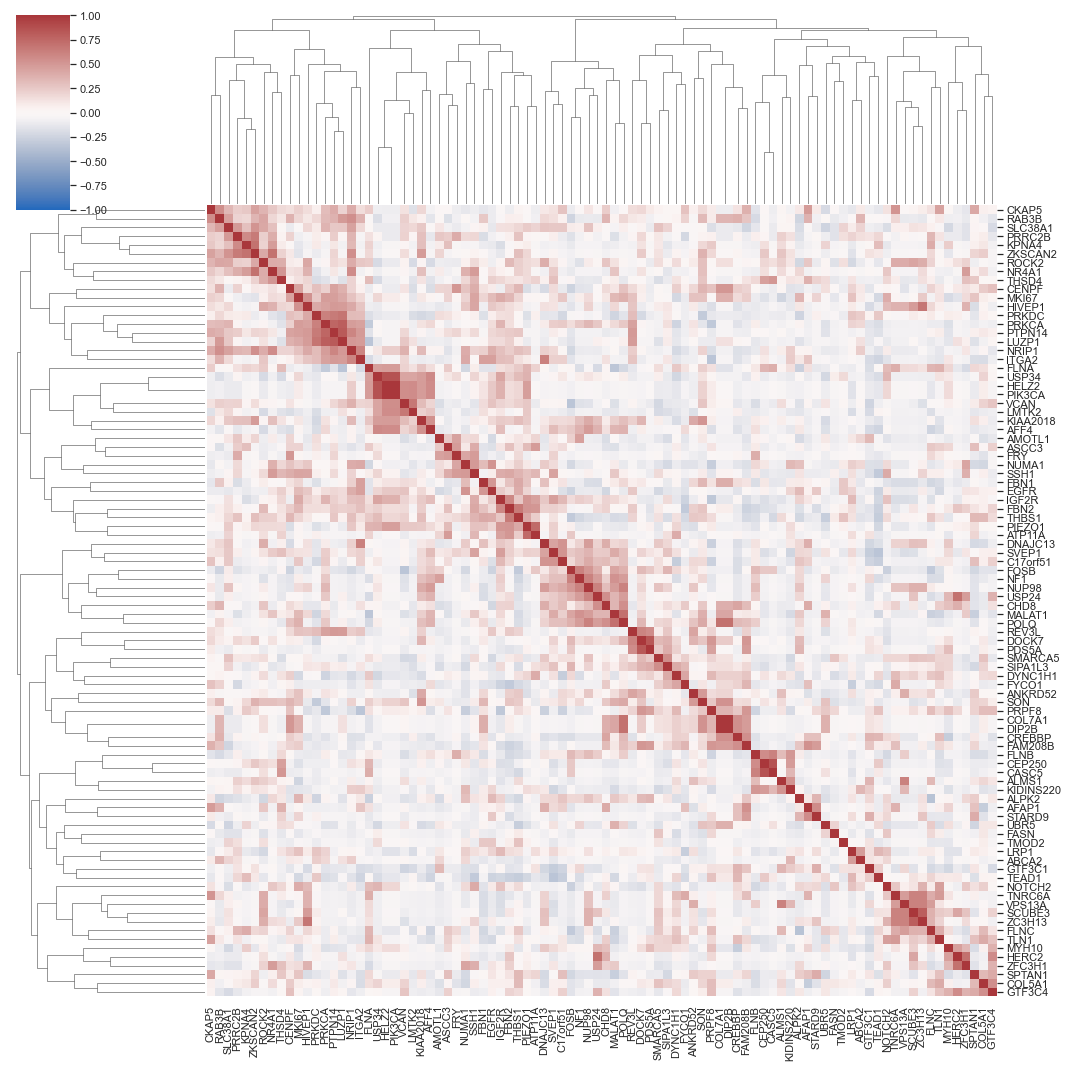

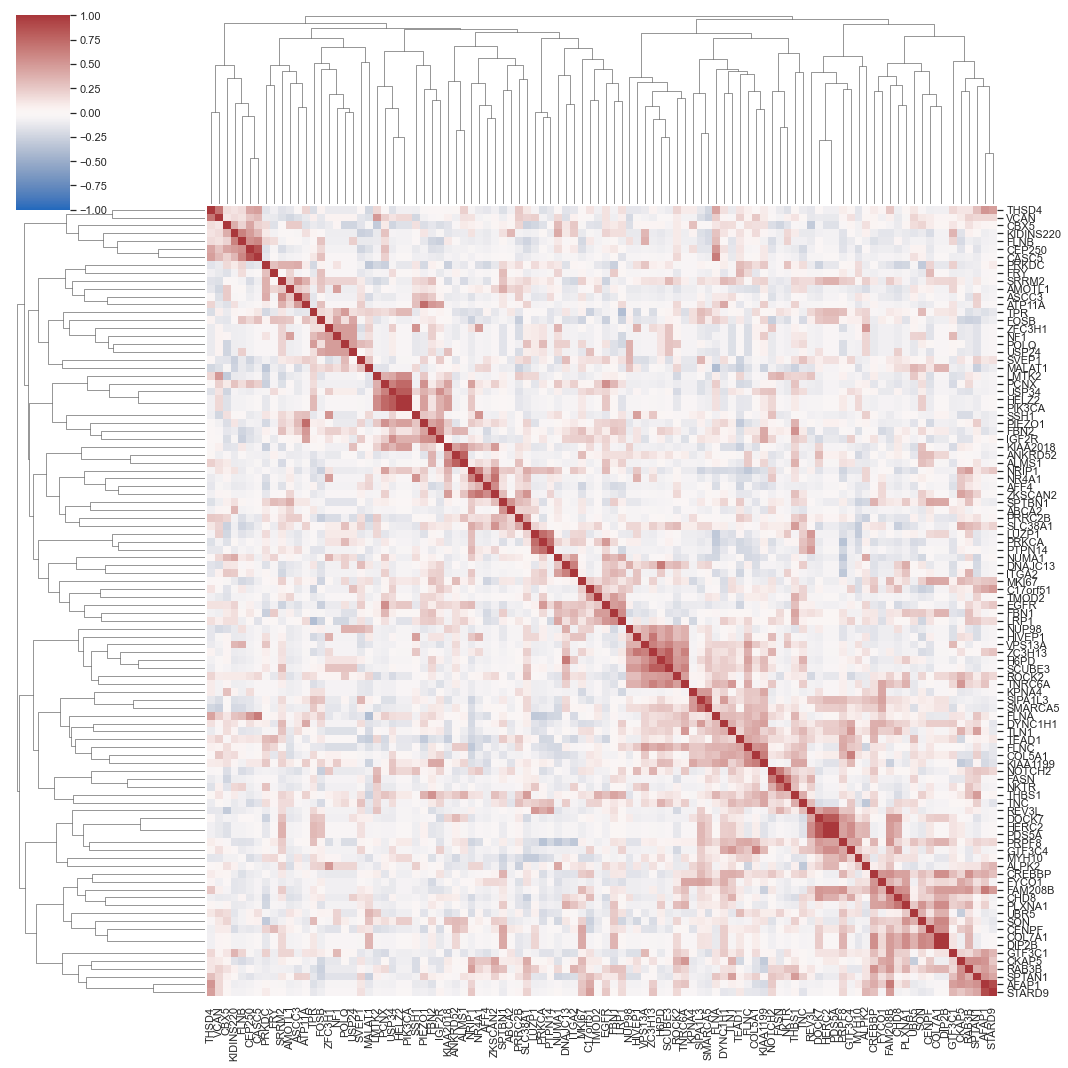

In [486]:
for item in corr_l:
    sns.clustermap(item, figsize=(15,15), xticklabels=True, yticklabels=True, cmap='vlag', vmin=-1, vmax=1)

In [414]:
# out_dir = r'..\merfish_data\140gene_analysis\patch_gene_num\results'
# pickle.dump(corr_l, open(os.path.join(out_dir,'n_gene_patch_corr_l.pkl'), 'wb'))

In [488]:
g10 = corr_l[0]
g20 = corr_l[1]

In [489]:
names = g10.columns.tolist()

In [490]:
g20_sub = g20.loc[names,names]

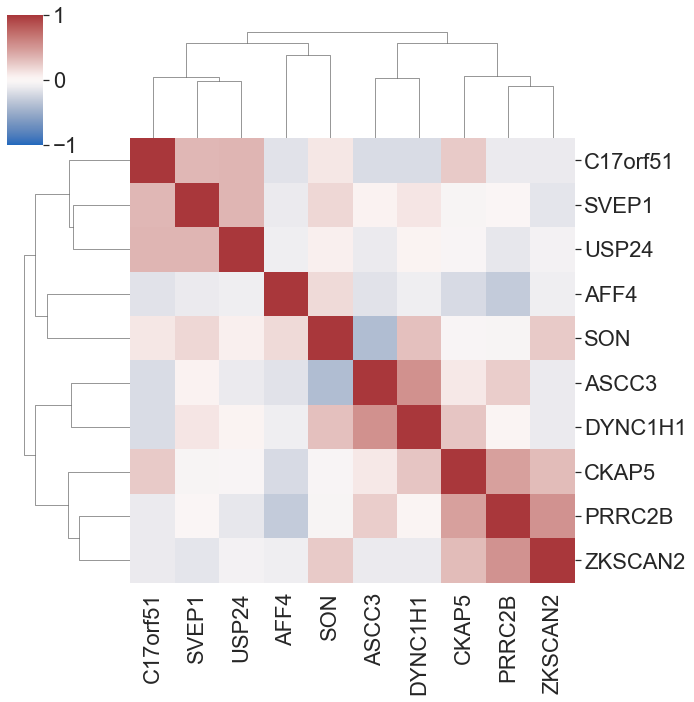

In [491]:
sns.set(font_scale=2)
sns.clustermap(g20_sub, cmap='vlag', vmin=-1, vmax=1)
plt.savefig(r'..\merfish_data\140gene_analysis\patch_gene_num\figures\20gene_sub10_correlation.png')

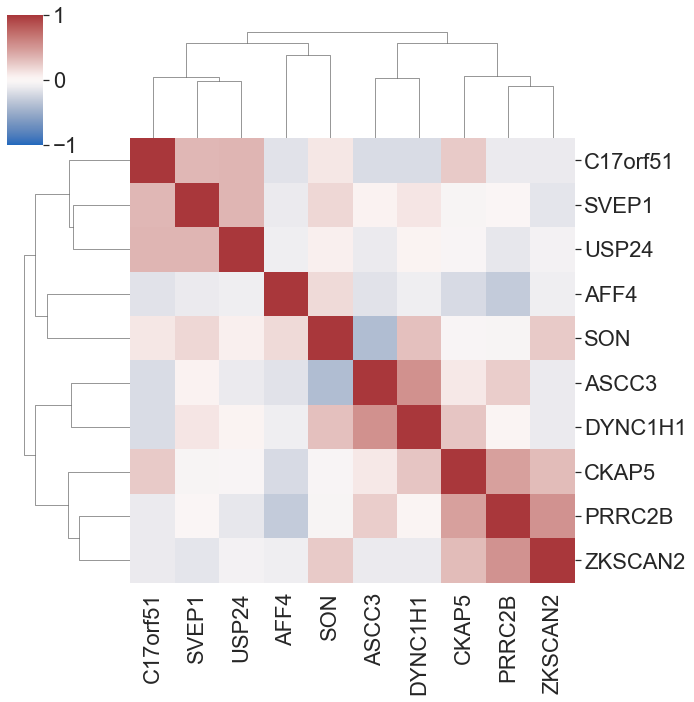

In [492]:
sns.set(font_scale=2)
sns.clustermap(g20_sub, cmap='vlag', vmin=-1, vmax=1)
plt.savefig(r'..\merfish_data\140gene_analysis\patch_gene_num\figures\10gene_correlation.png')

## Patch correlation visualization

In [53]:
cell_df = pd.read_pickle(r'..\merfish_data\140gene_example_analysis\cell_dfs\merfish_cell_06_cell.pkl')

In [54]:
cell_df

intCodeword geneName  isExactMatch  isCorrectedMatch  imageX  imageY  \
48859         9731    SRRM2             0                 1  -175.3   -19.9   
48860         1027    PRPF8             0                 1  -175.3   -19.9   
48861        10755    SRRM2             0                 1  -175.3   -19.9   
48863        35345     FLNA             0                 1  -175.3   -19.9   
48864         2577     FLNA             1                 0  -175.3   -19.9   
...            ...      ...           ...               ...     ...     ...   
57853        33284     FLNB             0                 1  -175.3   -19.9   
57855        36360      TNC             0                 1  -175.3   -19.9   
57857        40967    ITGA2             0                 1  -175.3   -19.9   
57859        35336      TNC             1                 0  -175.3   -19.9   
57860        36354    THBS1             0                 1  -175.3   -19.9   

       wordCentroidX  wordCentroidY patch  cellID  
48859      48.627865     115.566390    13       6  
48860      56.797554     133.948413    13       6  
48861      57.001046     153.922772     1       6  
48863      65.761847     154.294510     1       6  
48864      68.122284     165.019758     1       6  
...              ...            ...   ...     ...  
57853     143.161943     213.128133    27       6  
57855     180.022770      84.371306    34       6  
57857     198.764621      86.964836    21       6  
57859     212.483146     178.962764    22       6  
57860     230.889179     176.647328    23       6  

[3285 rows x 10 columns]

In [87]:
corr = pd.read_pickle(r'..\merfish_data\140gene_example_analysis\patch_corr\merfish_cell_06_exp_corr.pkl')

In [88]:
corr = corr['correlation']

C:\Users\zfang38\Anaconda3\envs\scenv\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


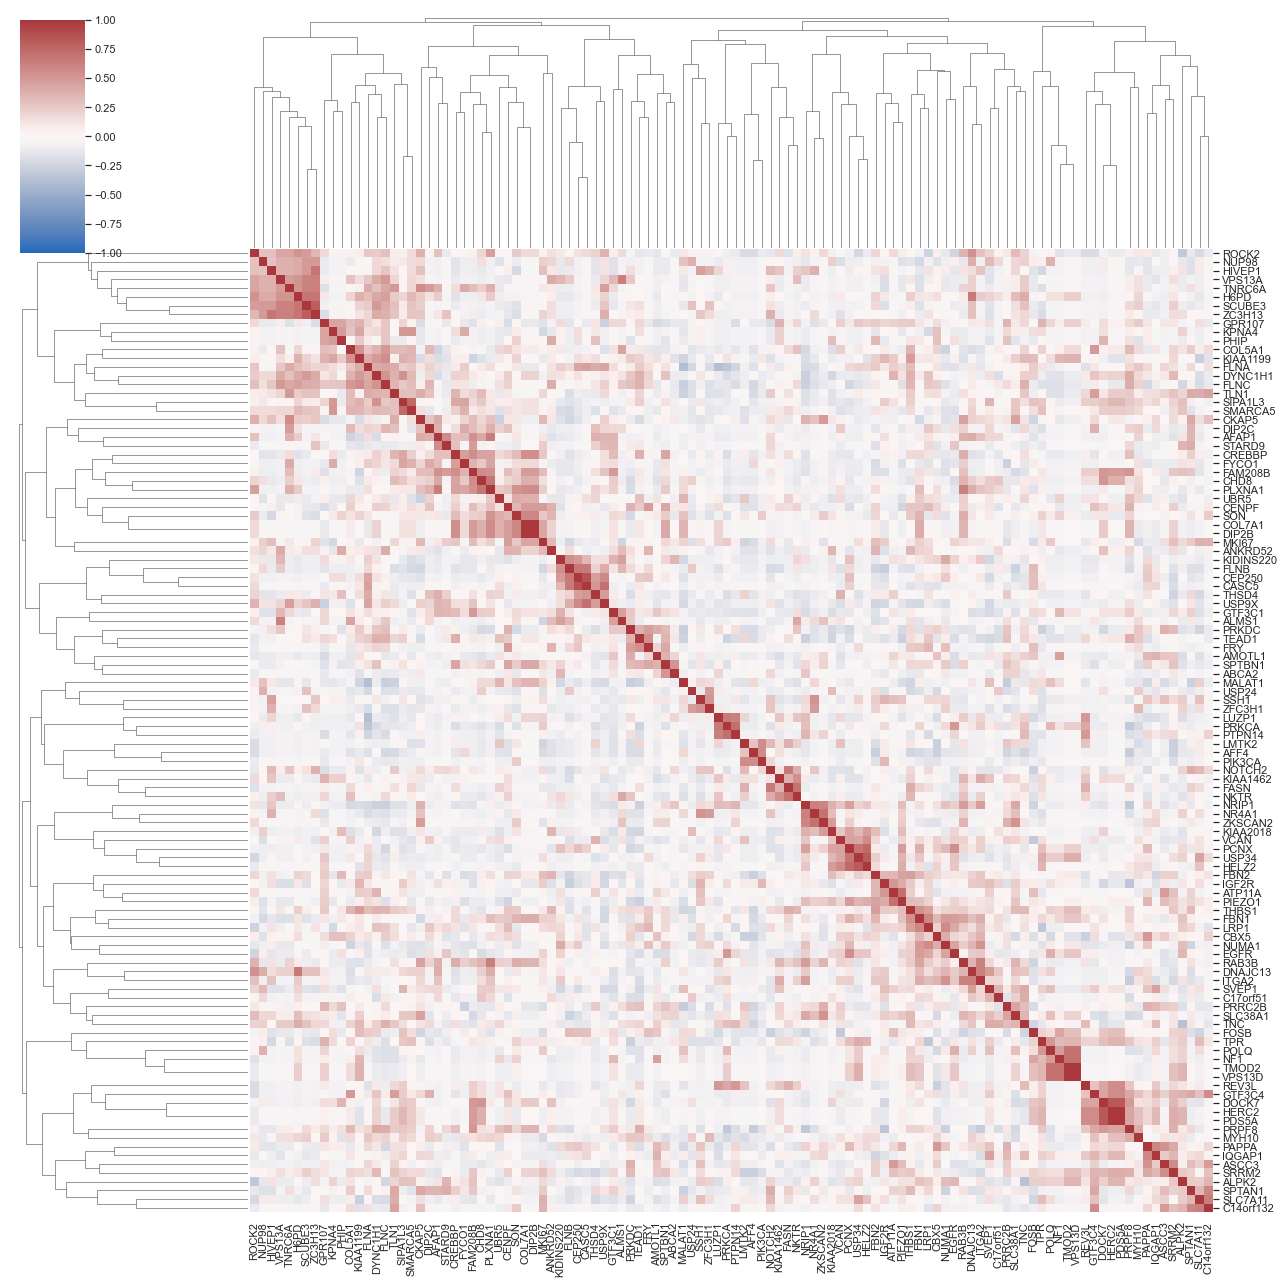

In [89]:
sns.set(font_scale=1.0)
sns.clustermap(corr, figsize=(18,18), xticklabels=True, yticklabels=True, cmap='vlag', vmin=-1, vmax=1)
# plt.savefig(r'.\figures\fibroblast cell15 patch correlation.png')

In [119]:
corr.loc['FLNA']['PRKCA']

-0.3355243551873767

In [111]:
t  = corr.values
temp = t.flatten()
temp = np.where(temp==1, 0, temp)
t_sorted = np.sort(temp)

In [112]:
np.argwhere(t == t_sorted[12091])

array([[44, 50],
       [50, 44]], dtype=int64)

In [57]:
genes = corr.columns.tolist()
neg_idx = [8,13,16,21,34,52,58,64,91]
pos_idx = [44,50,55,66,69,71,75,83,98]
neg_genes = []
for idx in neg_idx:
    neg_genes.append(genes[idx])
pos_genes = []
for idx in pos_idx:
    pos_genes.append(genes[idx])

In [58]:
neg_genes

['FLNA', 'IGF2R', 'LRP1', 'PRPF8', 'TNC', 'MALAT1', 'PRKCA', 'TPR', 'LUZP1']

In [59]:
pos_genes

['SCUBE3',
 'ZC3H13',
 'USP34',
 'DOCK7',
 'HERC2',
 'PDS5A',
 'CEP250',
 'HELZ2',
 'CASC5']

In [63]:
neg_df = corr.filter(neg_genes, axis=0)
neg_df = neg_df.filter(neg_genes, axis=1)

In [106]:
sns.set(font_scale=1.8)
sns.clustermap(neg_df, figsize=(8,8), xticklabels=True, yticklabels=True, cmap='vlag', vmin=-1, vmax=1)
# plt.savefig(r'.\figures\fibroblast cell06 neg patches.png')

NameError: name 'neg_df' is not defined

In [69]:
pos_df = corr.filter(pos_genes, axis=0)
pos_df = pos_df.filter(pos_genes, axis=1)

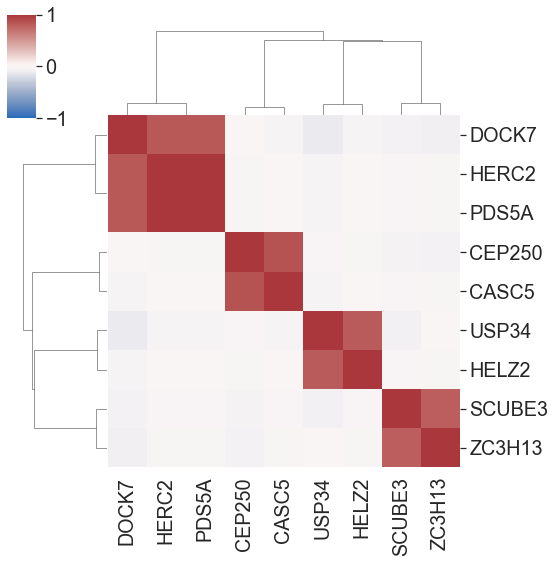

In [71]:
sns.set(font_scale=1.8)
sns.clustermap(pos_df, figsize=(8,8), xticklabels=True, yticklabels=True, cmap='vlag', vmin=-1, vmax=1)
plt.savefig(r'.\figures\fibroblast cell06 pos patches.png')

NameError: name 'comp_colors' is not defined

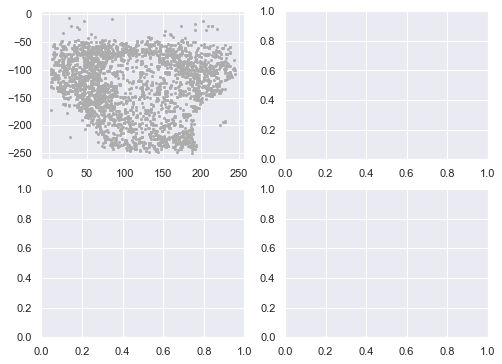

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(8,6))
axes = axes.flatten()
groups = cell_df.groupby('geneName')

ax = axes[0]
ax.plot(np.array(cell_df['wordCentroidY'].tolist()),-np.array(cell_df['wordCentroidX'].tolist()),
        '.',color='#acacac',markersize=4)
colored = ['FLNA','MALAT1']
for j in range(len(colored)):
    gene = colored[j]
    color = comp_colors[j+2]
    gene_sub = groups.get_group(gene)
    ax.plot(np.array(gene_sub['wordCentroidY'].tolist()),-np.array(gene_sub['wordCentroidX'].tolist()),
            '.',color=color,markersize=10)
    ax.text(390,-255+(j*(35)), s=gene, fontsize=30, fontweight='bold', color=color, horizontalalignment='right')

ax.axis('equal')
ax.axis('off')
    
ax = axes[1]
ax.plot(np.array(cell_df['wordCentroidY'].tolist()),-np.array(cell_df['wordCentroidX'].tolist()),
        '.',color='#acacac',markersize=4)
colored = ['FLNA','LUZP1']
for j in range(len(colored)):
    gene = colored[j]
    color = comp_colors[j+2]
    gene_sub = groups.get_group(gene)
    ax.plot(np.array(gene_sub['wordCentroidY'].tolist()),-np.array(gene_sub['wordCentroidX'].tolist()),
            '.',color=color,markersize=10)
    ax.text(390,-255+(j*(35)), s=gene, fontsize=30, fontweight='bold', color=color, horizontalalignment='right')

ax.axis('equal')
ax.axis('off')
    
ax = axes[2]
ax.plot(np.array(cell_df['wordCentroidY'].tolist()),-np.array(cell_df['wordCentroidX'].tolist()),
        '.',color='#acacac',markersize=4)
colored = ['PRPF8','PRKCA']
for j in range(len(colored)):
    gene = colored[j]
    color = comp_colors[j+2]
    gene_sub = groups.get_group(gene)
    ax.plot(np.array(gene_sub['wordCentroidY'].tolist()),-np.array(gene_sub['wordCentroidX'].tolist()),
            '.',color=color,markersize=10)
    ax.text(390,-255+(j*(35)), s=gene, fontsize=30, fontweight='bold', color=color, horizontalalignment='right')

ax.axis('equal')
ax.axis('off')

ax = axes[3]
ax.plot(np.array(cell_df['wordCentroidY'].tolist()),-np.array(cell_df['wordCentroidX'].tolist()),
        '.',color='#acacac',markersize=4)
colored = ['FLNA','PRKCA']
for j in range(len(colored)):
    gene = colored[j]
    color = comp_colors[j+2]
    gene_sub = groups.get_group(gene)
    ax.plot(np.array(gene_sub['wordCentroidY'].tolist()),-np.array(gene_sub['wordCentroidX'].tolist()),
            '.',color=color,markersize=10)
    ax.text(390,-255+(j*(35)), s=gene, fontsize=30, fontweight='bold', color=color, horizontalalignment='right')

ax.axis('equal')
ax.axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
# plt.savefig(r'.\figures\cell06 negative correlation.png')
plt.show()

In [56]:
cell_df

intCodeword geneName  isExactMatch  isCorrectedMatch  imageX  imageY  \
48859         9731    SRRM2             0                 1  -175.3   -19.9   
48860         1027    PRPF8             0                 1  -175.3   -19.9   
48861        10755    SRRM2             0                 1  -175.3   -19.9   
48863        35345     FLNA             0                 1  -175.3   -19.9   
48864         2577     FLNA             1                 0  -175.3   -19.9   
...            ...      ...           ...               ...     ...     ...   
57853        33284     FLNB             0                 1  -175.3   -19.9   
57855        36360      TNC             0                 1  -175.3   -19.9   
57857        40967    ITGA2             0                 1  -175.3   -19.9   
57859        35336      TNC             1                 0  -175.3   -19.9   
57860        36354    THBS1             0                 1  -175.3   -19.9   

       wordCentroidX  wordCentroidY patch  cellID  
48859      48.627865     115.566390    13       6  
48860      56.797554     133.948413    13       6  
48861      57.001046     153.922772     1       6  
48863      65.761847     154.294510     1       6  
48864      68.122284     165.019758     1       6  
...              ...            ...   ...     ...  
57853     143.161943     213.128133    27       6  
57855     180.022770      84.371306    34       6  
57857     198.764621      86.964836    21       6  
57859     212.483146     178.962764    22       6  
57860     230.889179     176.647328    23       6  

[3285 rows x 10 columns]

In [85]:
counts = {}
genes = list(np.unique(cell_df['geneName'].tolist()))
bygene_groups = cell_df.groupby('geneName')
for gene in genes:
    counts[gene] = bygene_groups.get_group(gene).shape[0]

In [86]:
counts

{'ABCA2': 1,
 'AFAP1': 3,
 'AFF4': 3,
 'ALMS1': 5,
 'ALPK2': 7,
 'AMOTL1': 10,
 'ANKRD52': 24,
 'ASCC3': 4,
 'ATP11A': 1,
 'C14orf132': 2,
 'C17orf51': 4,
 'CASC5': 1,
 'CBX5': 34,
 'CENPF': 19,
 'CEP250': 6,
 'CHD8': 6,
 'CKAP5': 19,
 'COL5A1': 75,
 'COL7A1': 1,
 'CREBBP': 26,
 'DIP2B': 1,
 'DIP2C': 2,
 'DNAJC13': 5,
 'DOCK7': 7,
 'DYNC1H1': 28,
 'EGFR': 9,
 'FAM208B': 4,
 'FASN': 2,
 'FBN1': 38,
 'FBN2': 185,
 'FLNA': 331,
 'FLNB': 11,
 'FLNC': 48,
 'FOSB': 9,
 'FRY': 1,
 'FYCO1': 9,
 'GPR107': 28,
 'GTF3C1': 17,
 'GTF3C4': 3,
 'H6PD': 7,
 'HELZ2': 1,
 'HERC2': 2,
 'HIVEP1': 3,
 'IGF2R': 57,
 'IQGAP1': 28,
 'ITGA2': 3,
 'KIAA1199': 47,
 'KIAA1462': 13,
 'KIAA2018': 4,
 'KIDINS220': 13,
 'KPNA4': 2,
 'LMTK2': 3,
 'LRP1': 37,
 'LUZP1': 10,
 'MALAT1': 84,
 'MKI67': 95,
 'MYH10': 33,
 'NF1': 2,
 'NKTR': 4,
 'NOTCH2': 12,
 'NR4A1': 2,
 'NRIP1': 9,
 'NUMA1': 35,
 'NUP98': 3,
 'PAPPA': 12,
 'PCNX': 8,
 'PDS5A': 1,
 'PHIP': 2,
 'PIEZO1': 23,
 'PIK3CA': 1,
 'PLXNA1': 3,
 'POLQ': 2,
 'PRKCA': 

In [105]:
corr.loc['PRPF8']['SRRM2']

0.37683568236693904

In [92]:
corr

AMOTL1     ASCC3    ATP11A    COL5A1    CREBBP       DYNC1H1  \
AMOTL1     1.000000  0.267740  0.192927 -0.143425 -0.047221  3.572855e-17   
ASCC3      0.267740  1.000000  0.480384 -0.057601 -0.039193  9.712859e-02   
ATP11A     0.192927  0.480384  1.000000 -0.064565  0.043931  3.577195e-01   
COL5A1    -0.143425 -0.057601 -0.064565  1.000000  0.047409  3.636544e-01   
CREBBP    -0.047221 -0.039193  0.043931  0.047409  1.000000  2.055655e-01   
...             ...       ...       ...       ...       ...           ...   
COL7A1    -0.064309 -0.053376 -0.025641  0.083012  0.546005  2.021893e-01   
DIP2B     -0.064309 -0.053376 -0.025641  0.083012  0.546005  2.021893e-01   
TMOD2     -0.064309 -0.053376 -0.025641  0.156800 -0.081587 -1.088711e-01   
VPS13D    -0.064309 -0.053376 -0.025641  0.156800 -0.081587 -1.088711e-01   
C14orf132 -0.064309  0.480384 -0.025641  0.156800 -0.081587 -1.088711e-01   

               FBN1      FBN2      FLNA      FLNC  ...     ABCA2     LMTK2  \
AMOTL1    -0.015887  0.043217 -0.027315 -0.129350  ...  0.192927 -0.114357   
ASCC3     -0.118678  0.217107  0.179860 -0.042944  ... -0.053376 -0.094916   
ATP11A     0.006335  0.340091  0.224354 -0.020630  ... -0.025641 -0.045596   
COL5A1     0.034180  0.000326  0.268229  0.497193  ... -0.064565 -0.071074   
CREBBP     0.175201 -0.054384  0.088323  0.123708  ... -0.081587  0.078121   
...             ...       ...       ...       ...  ...       ...       ...   
COL7A1     0.386409  0.086157 -0.124157 -0.020630  ... -0.025641 -0.045596   
DIP2B      0.386409  0.086157 -0.124157 -0.020630  ... -0.025641 -0.045596   
TMOD2      0.259717  0.086157 -0.037029 -0.123777  ... -0.025641 -0.045596   
VPS13D     0.259717  0.086157 -0.037029 -0.123777  ... -0.025641 -0.045596   
C14orf132  0.006335  0.122433  0.137226 -0.123777  ... -0.025641 -0.045596   

               AFF4    PIK3CA       FRY    COL7A1     DIP2B     TMOD2  \
AMOTL1    -0.114357 -0.064309  0.192927 -0.064309 -0.064309 -0.064309   
ASCC3     -0.094916 -0.053376 -0.053376 -0.053376 -0.053376 -0.053376   
ATP11A    -0.045596 -0.025641 -0.025641 -0.025641 -0.025641 -0.025641   
COL5A1    -0.158550 -0.064565 -0.138353  0.083012  0.083012  0.156800   
CREBBP    -0.145082 -0.081587  0.043931  0.546005  0.546005 -0.081587   
...             ...       ...       ...       ...       ...       ...   
COL7A1    -0.045596 -0.025641 -0.025641  1.000000  1.000000 -0.025641   
DIP2B     -0.045596 -0.025641 -0.025641  1.000000  1.000000 -0.025641   
TMOD2     -0.045596 -0.025641 -0.025641 -0.025641 -0.025641  1.000000   
VPS13D    -0.045596 -0.025641 -0.025641 -0.025641 -0.025641  1.000000   
C14orf132 -0.045596 -0.025641 -0.025641 -0.025641 -0.025641 -0.025641   

             VPS13D  C14orf132  
AMOTL1    -0.064309  -0.064309  
ASCC3     -0.053376   0.480384  
ATP11A    -0.025641  -0.025641  
COL5A1     0.156800   0.156800  
CREBBP    -0.081587  -0.081587  
...             ...        ...  
COL7A1    -0.025641  -0.025641  
DIP2B     -0.025641  -0.025641  
TMOD2      1.000000  -0.025641  
VPS13D     1.000000  -0.025641  
C14orf132 -0.025641   1.000000  

[110 rows x 110 columns]

In [59]:
patch_count = util.counting(cell_df, count_by='patch', gene_name='geneName')

In [60]:
patch_count

AMOTL1  ASCC3  ATP11A  COL5A1  CREBBP  DYNC1H1  FBN1  FBN2  FLNA  FLNC  \
0      1.0    1.0     1.0     1.0     1.0      3.0   1.0  14.0  16.0   1.0   
1      0.0    0.0     0.0     3.0     0.0      4.0   0.0   6.0  19.0   6.0   
2      0.0    0.0     0.0     4.0     4.0      1.0   0.0   7.0  14.0   2.0   
3      1.0    0.0     0.0     5.0     0.0      0.0   2.0   4.0   9.0   3.0   
4      0.0    0.0     0.0     5.0     3.0      2.0   0.0   2.0  14.0   3.0   
5      0.0    0.0     0.0     3.0     0.0      2.0   1.0   1.0   9.0   0.0   
6      0.0    0.0     0.0     5.0     0.0      0.0   1.0  10.0  13.0   1.0   
7      0.0    0.0     0.0     0.0     0.0      1.0   5.0   4.0   4.0   0.0   
8      2.0    1.0     0.0     0.0     1.0      1.0   0.0   4.0   5.0   0.0   
9      0.0    0.0     0.0     2.0     0.0      0.0   2.0   9.0  15.0   0.0   
10     0.0    0.0     0.0     0.0     3.0      0.0   0.0   1.0  17.0   2.0   
11     0.0    0.0     0.0     6.0     0.0      1.0   0.0   0.0  10.0   3.0   
12     0.0    0.0     0.0    10.0     0.0      3.0   1.0   3.0   9.0   5.0   
13     0.0    0.0     0.0     0.0     0.0      0.0   0.0   1.0   4.0   0.0   
14     0.0    0.0     0.0     2.0     0.0      0.0   0.0   9.0   1.0   2.0   
15     1.0    0.0     0.0     1.0     1.0      0.0   0.0   3.0   5.0   0.0   
16     0.0    0.0     0.0     4.0     0.0      1.0   1.0   2.0  10.0   3.0   
17     3.0    0.0     0.0     1.0     0.0      0.0   1.0   5.0   6.0   0.0   
18     0.0    0.0     0.0     1.0     0.0      0.0   1.0   5.0   2.0   0.0   
19     0.0    0.0     0.0     1.0     0.0      1.0   0.0  12.0   5.0   0.0   
20     0.0    0.0     0.0     1.0     0.0      1.0   0.0   1.0  24.0   1.0   
21     0.0    0.0     0.0     0.0     3.0      0.0   1.0   0.0   4.0   0.0   
22     1.0    0.0     0.0     1.0     0.0      0.0   0.0   2.0   8.0   0.0   
23     0.0    0.0     0.0     2.0     3.0      1.0   3.0   3.0   6.0   2.0   
24     0.0    1.0     0.0     1.0     0.0      0.0   0.0   4.0  11.0   3.0   
25     0.0    0.0     0.0     2.0     0.0      0.0   1.0   4.0   6.0   0.0   
26     0.0    0.0     0.0     0.0     0.0      2.0   0.0   0.0   7.0   0.0   
27     0.0    0.0     0.0     1.0     0.0      0.0   0.0   2.0   6.0   0.0   
28     0.0    0.0     0.0     0.0     0.0      0.0   1.0   2.0   0.0   0.0   
29     0.0    0.0     0.0     1.0     0.0      0.0   0.0   0.0   8.0   0.0   
30     0.0    0.0     0.0     0.0     1.0      0.0   0.0   1.0   2.0   3.0   
31     0.0    0.0     0.0     0.0     0.0      0.0   0.0   3.0   1.0   0.0   
32     0.0    0.0     0.0     1.0     0.0      0.0   0.0   1.0   0.0   0.0   
33     0.0    0.0     0.0     0.0     0.0      0.0   0.0   0.0   1.0   0.0   
34     0.0    0.0     0.0     0.0     0.0      0.0   3.0  13.0  12.0   1.0   
35     1.0    0.0     0.0     0.0     1.0      2.0   3.0   5.0  13.0   3.0   
36     0.0    0.0     0.0     3.0     5.0      2.0   4.0   7.0   4.0   1.0   
37     0.0    0.0     0.0     0.0     0.0      0.0   2.0  20.0  11.0   3.0   
38     0.0    0.0     0.0     4.0     0.0      0.0   3.0   7.0   7.0   0.0   
39     0.0    1.0     0.0     4.0     0.0      0.0   1.0   8.0  13.0   0.0   

    ...  ABCA2  LMTK2  AFF4  PIK3CA  FRY  COL7A1  DIP2B  TMOD2  VPS13D  \
0   ...    0.0    0.0   0.0     0.0  0.0     0.0    0.0    0.0     0.0   
1   ...    0.0    0.0   0.0     0.0  0.0     0.0    0.0    0.0     0.0   
2   ...    0.0    0.0   0.0     0.0  0.0     0.0    0.0    0.0     0.0   
3   ...    0.0    0.0   0.0     0.0  0.0     0.0    0.0    0.0     0.0   
4   ...    0.0    0.0   0.0     0.0  0.0     0.0    0.0    0.0     0.0   
5   ...    0.0    0.0   0.0     0.0  0.0     0.0    0.0    0.0     0.0   
6   ...    0.0    0.0   0.0     0.0  0.0     0.0    0.0    0.0     0.0   
7   ...    0.0    0.0   0.0     0.0  0.0     0.0    0.0    0.0     0.0   
8   ...    0.0    0.0   0.0     0.0  0.0     0.0    0.0    0.0     0.0   
9   ...    0.0    0.0   0.0     0.0  0.0     0.0    0.0    0.0   

TypeError: _set_ticklabels() missing 1 required positional argument: 'labels'

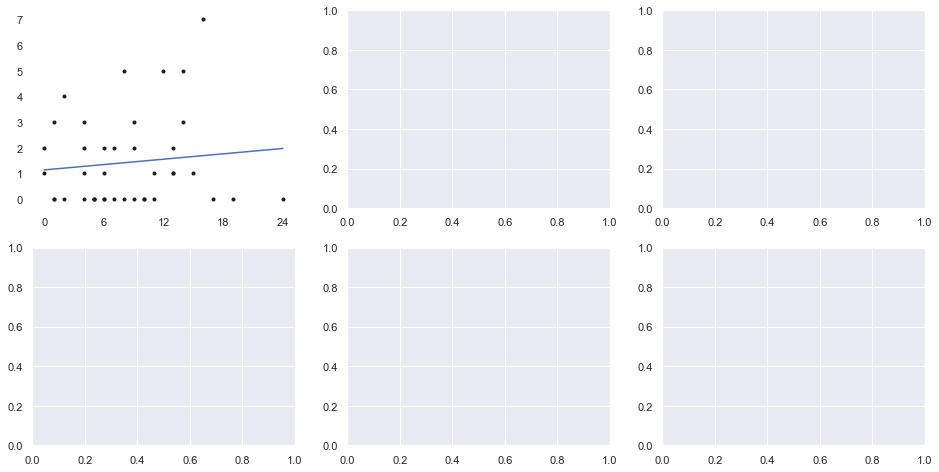

In [106]:
fig, axes = plt.subplots(2, 3, figsize=(16,8))
axes = axes.flatten()
groups = cell_df.groupby('geneName')

pos_pairs = [['FLNA', 'IGF2R'],['SRRM2','PRPF8'],['LUZP1','PRKCA']]
neg_pairs = [['FLNA','MALAT1'],['PRKCA','PRPF8'],['FLNA','PRKCA']] 

for i in range(3):
    ax = axes[i]
    x = patch_count[pos_pairs[i][0]].tolist()
    y = patch_count[pos_pairs[i][1]].tolist()
    ax.plot(x, y, 'k.')
    b,a = np.polyfit(x, y, deg=1)
    xseq = np.linspace(0, np.max(x), num=100)
    ax.plot(xseq, a+b*xseq)
    ax.set_facecolor('#ffffff')
    ax.set_xticks(ticks=np.linspace(0, np.max(x), num=5))
    ax.set_xticklabels(fontsize=25)
    ax.set_yticklabels(fontsize=25)
    ax.set_xlabel(pos_pairs[i][0], fontsize=35)
    ax.set_ylabel(pos_pairs[i][1], fontsize=35)

for i in range(3):
    ax = axes[i+3]
    x = patch_count[neg_pairs[i][0]].tolist()
    y = patch_count[neg_pairs[i][1]].tolist()
    ax.plot(x, y, 'k.')
    b,a = np.polyfit(x, y, deg=1)
    xseq = np.linspace(0, np.max(x), num=100)
    ax.plot(xseq, a+b*xseq)
    ax.set_facecolor('#ffffff')
    ax.set_xticks(ticks=np.linspace(0, np.max(x), num=5))
    ax.set_xlabel(neg_pairs[i][0],fontsize=35)
    ax.set_ylabel(neg_pairs[i][1],fontsize=35)

plt.tight_layout()
# plt.savefig(r'.\figures\correlation scatter.png')
plt.show()

In [97]:
comp_colors = util.get_complementary_colors()

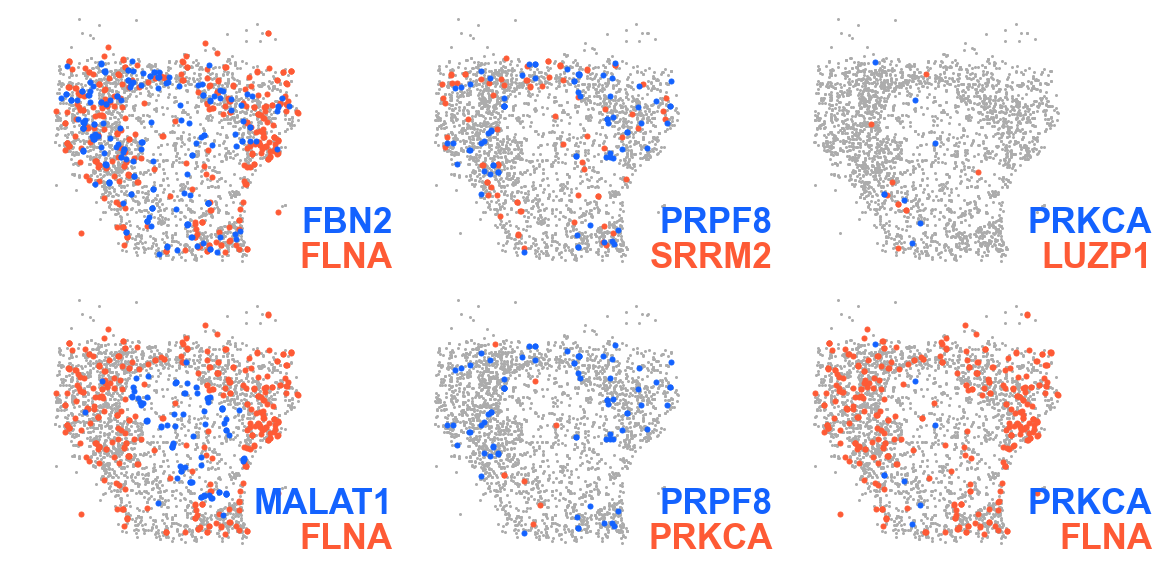

In [110]:
fig, axes = plt.subplots(2, 3, figsize=(16,8))
axes = axes.flatten()
groups = cell_df.groupby('geneName')

pos_pairs = [['FLNA', 'FBN2'],['SRRM2','PRPF8'],['LUZP1','PRKCA']]
neg_pairs = [['FLNA','MALAT1'],['PRKCA','PRPF8'],['FLNA','PRKCA']] 

for i in range(3):
    ax = axes[i]
    ax.plot(np.array(cell_df['wordCentroidY'].tolist()),-np.array(cell_df['wordCentroidX'].tolist()),
        '.',color='#acacac',markersize=4)
    colored = pos_pairs[i]
    for j in range(len(colored)):
        gene = colored[j]
        color = comp_colors[j+2]
        gene_sub = groups.get_group(gene)
        ax.plot(np.array(gene_sub['wordCentroidY'].tolist()),-np.array(gene_sub['wordCentroidX'].tolist()),
                '.',color=color,markersize=10)
        ax.text(340,-255+(j*(35)), s=gene, fontsize=35, fontweight='bold', color=color, horizontalalignment='right')
    ax.axis('equal')
    ax.axis('off')

for i in range(3):
    ax = axes[i+3]
    ax.plot(np.array(cell_df['wordCentroidY'].tolist()),-np.array(cell_df['wordCentroidX'].tolist()),
        '.',color='#acacac',markersize=4)
    colored = neg_pairs[i]
    for j in range(len(colored)):
        gene = colored[j]
        color = comp_colors[j+2]
        gene_sub = groups.get_group(gene)
        ax.plot(np.array(gene_sub['wordCentroidY'].tolist()),-np.array(gene_sub['wordCentroidX'].tolist()),
                '.',color=color,markersize=10)
        ax.text(340,-255+(j*(35)), s=gene, fontsize=35, fontweight='bold', color=color, horizontalalignment='right')
    ax.axis('equal')
    ax.axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
# plt.savefig(r'.\figures\cell06 correlation scatter high copy number.png')
plt.show()